In [1]:
library(Matrix)
suppressPackageStartupMessages(library(Seurat))
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(viridis))
library(RColorBrewer)
library(data.table)

Warning message in system("timedatectl", intern = TRUE):
"running command 'timedatectl' had status 1"

Attaching package: 'data.table'


The following objects are masked from 'package:dplyr':

    between, first, last


The following object is masked from 'package:purrr':

    transpose




In [2]:
prop_area = function(obj_parse) {
    samples = sort(unique(obj_parse$timepoint))
    dflist = list()
    for (i in 1:length(unique(obj_parse$timepoint))){
      tp=obj_parse@meta.data[obj_parse@meta.data$timepoint == samples[i],]
      tp_df=as.data.frame(table(tp$subtypes))
      tp_df$percentage=tp_df$Freq/nrow(tp)
      tp_df$timepoint=rep(i,nrow(tp_df))
      dflist[[i]]=tp_df
    }
    df = do.call(rbind, dflist)
    df <- df[order(df$timepoint),]
    colnames(df)= c("subtypes","Freq","percentage","timepoint")
    return(df)
}


In [3]:
sex_palette = c('Male' = 'blue', 'Female' = 'pink')

tp_palette = c('PND_04' = '#e1c1da',
                'PND_10' = '#f0a1e0',
                'PND_14' = '#ff83f1',
                'PND_25' = '#d453d7',
                'PND_36' = '#ae01d7',
                'PNM_02' = '#970083',
                'PNM_18' = '#560085')

tech_palette = c('Parse' = '#801b73',
                '10x' = '#00a1df')

# Fig. S1a

In [4]:
tissue = "adrenal"
obj = readRDS(paste0("../snrna/",tissue,"/seurat/",tissue,"_Parse_10x_integrated.rds"))


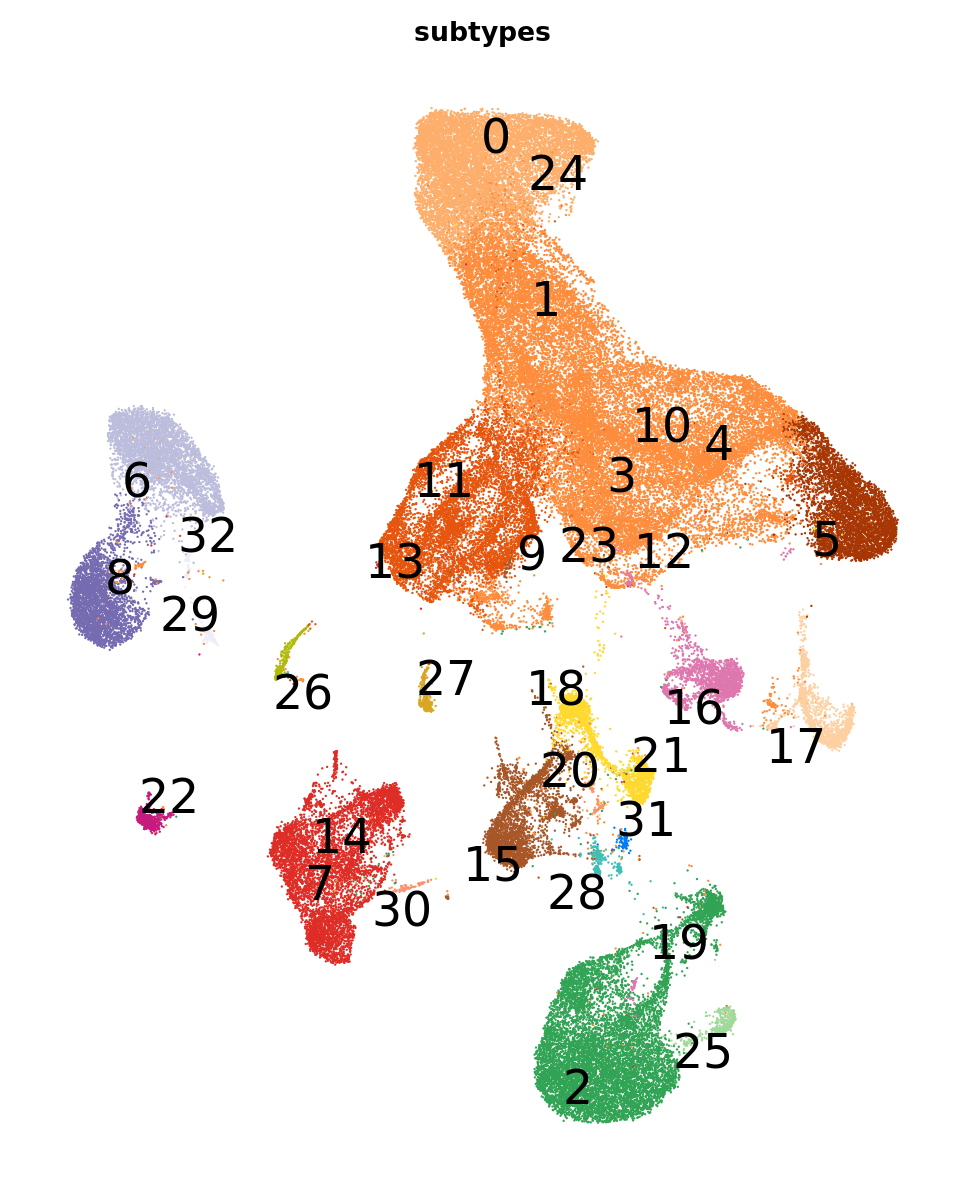

In [5]:
options(repr.plot.width = 8, repr.plot.height = 10)

cols = read.csv(paste0("../snrna/ref/",tissue,"_celltypes_colors.csv"))
cols = unique(cols[,c("subtypes","subtype_color")])
subtype_palette = cols$subtype_color
names(subtype_palette) = cols$subtypes

umap_plot = DimPlot(obj, group.by = "subtypes", label = FALSE)
umap_plot$data$seurat_clusters = obj@meta.data$seurat_clusters

LabelClusters(umap_plot, id = "seurat_clusters", size = 10) + 
    scale_color_manual(values = subtype_palette) +
    NoAxes() + NoLegend()

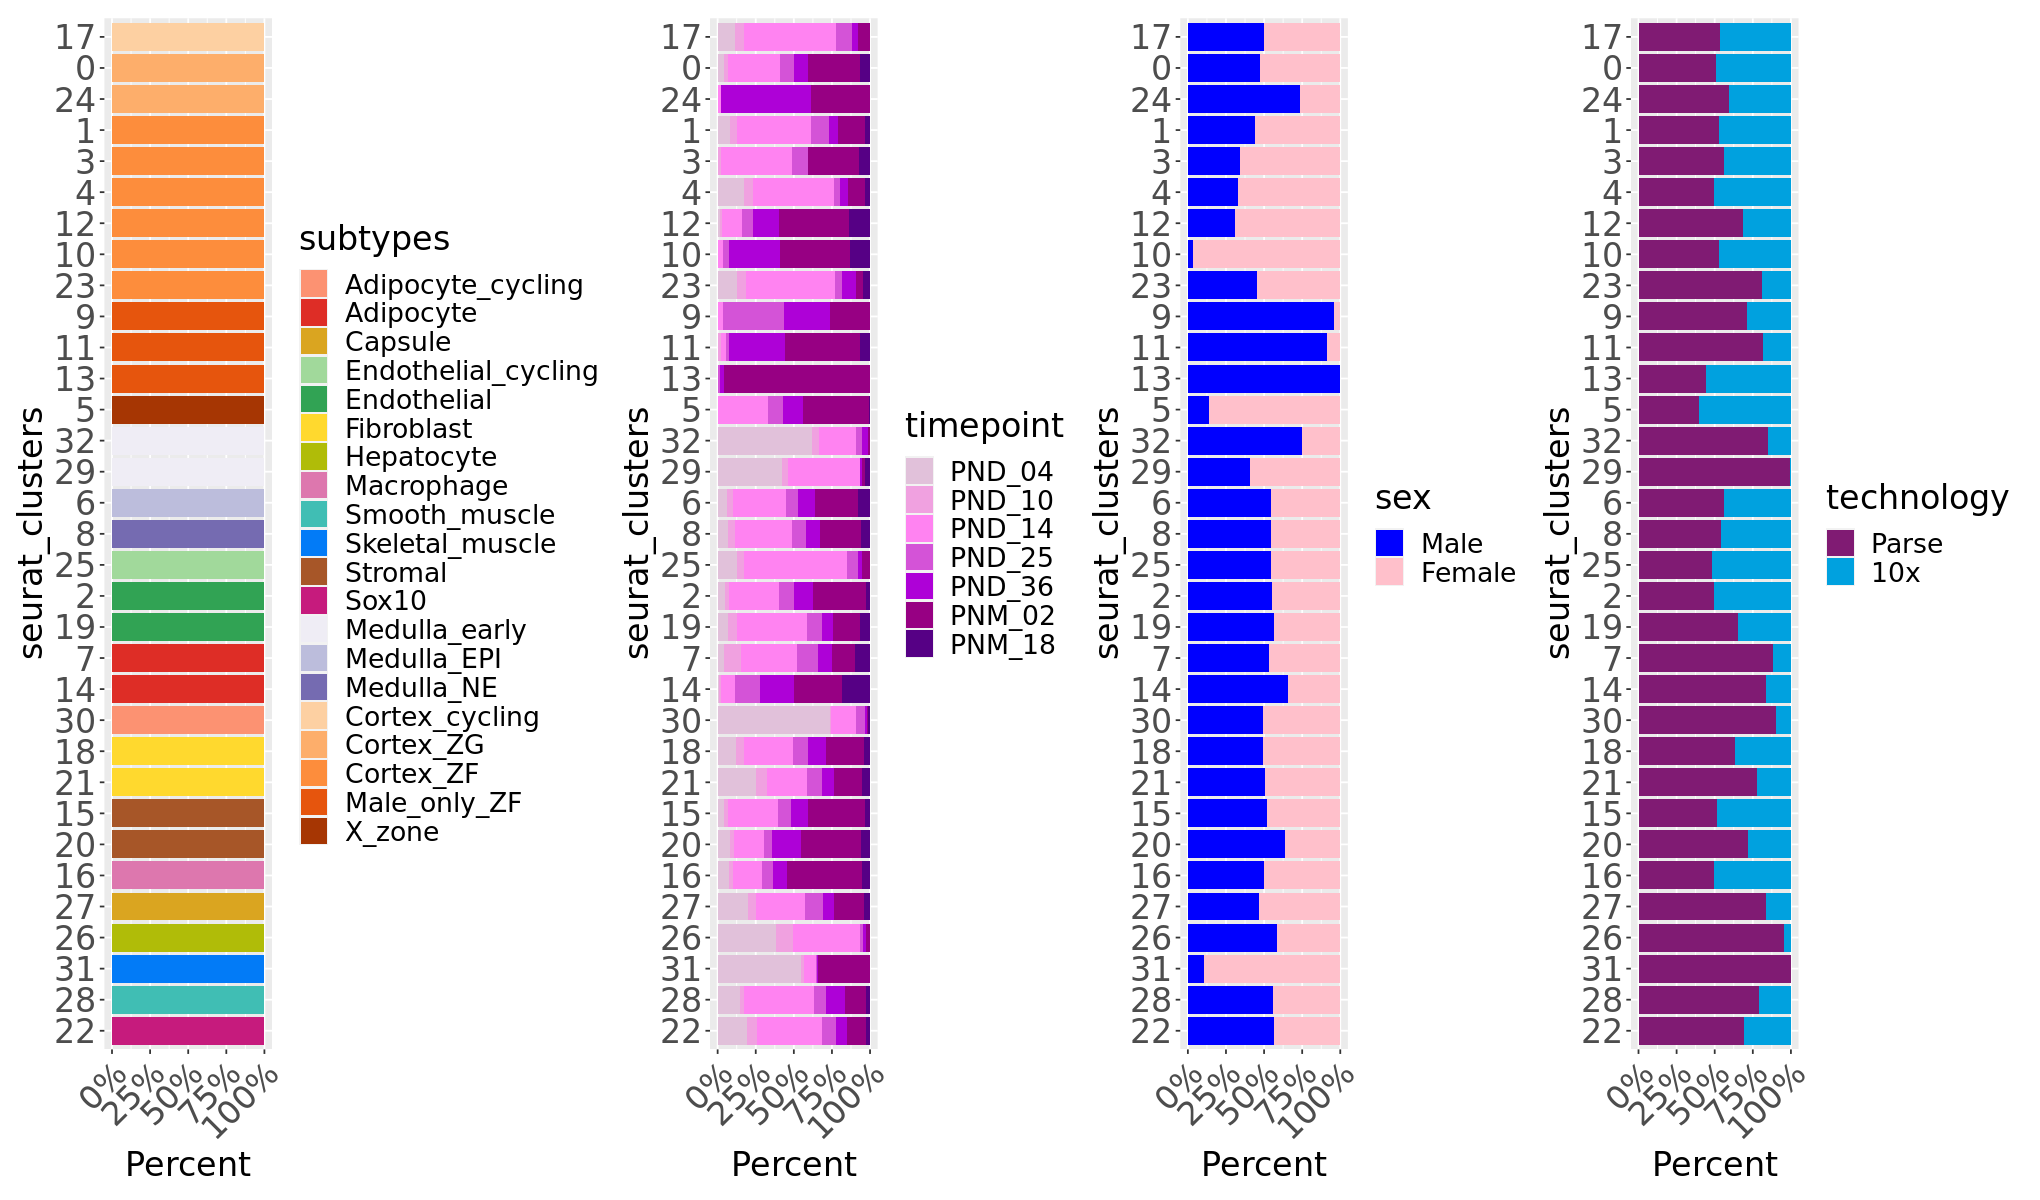

In [6]:
options(repr.plot.width = 17, repr.plot.height = 10)


order = c(17,0,24,1,3,4,12,10,23,9,11,13,5,32,29,
          6,8,25,2,19,7,14,30,18,21,15,20,16,27,26,31,28,22)

obj@meta.data$seurat_clusters = factor(obj@meta.data$seurat_clusters, levels = rev(order))
obj@meta.data$timepoint = factor(obj@meta.data$timepoint, levels = rev(names(tp_palette)))

p1 = ggplot(obj@meta.data, aes(x=seurat_clusters, fill=subtypes)) + geom_bar(position = "fill") + 
    scale_fill_manual(values = subtype_palette) + 
    ylab("Percent") +
    scale_y_continuous(labels = scales::percent,
                     limits = c(0, 1)) +
    theme(text = element_text(size = 20), 
          axis.text.x = element_text(size = 20, angle = 45, hjust = 1), 
          axis.text.y = element_text(size = 20)) + coord_flip()


p2 = ggplot(obj@meta.data, aes(x=seurat_clusters, fill=timepoint)) + geom_bar(position = "fill") + 
    scale_fill_manual(values = tp_palette) + 
    ylab("Percent") +
    scale_y_continuous(labels = scales::percent,
                     limits = c(0, 1)) +
    theme(text = element_text(size = 20), 
          axis.text.x = element_text(size = 20, angle = 45, hjust = 1), 
          axis.text.y = element_text(size = 20)) + coord_flip()


p3 = ggplot(obj@meta.data, aes(x=seurat_clusters, fill=sex)) + geom_bar(position = "fill") + 
    scale_fill_manual(values = sex_palette) + 
    ylab("Percent") +
    scale_y_continuous(labels = scales::percent,
                     limits = c(0, 1)) +
    theme(text = element_text(size = 20), 
          axis.text.x = element_text(size = 20, angle = 45, hjust = 1), 
          axis.text.y = element_text(size = 20)) + coord_flip()


p4 = ggplot(obj@meta.data, aes(x=seurat_clusters, fill=technology)) + geom_bar(position = "fill") + 
    scale_fill_manual(values = tech_palette) + 
    ylab("Percent") +
    scale_y_continuous(labels = scales::percent,
                     limits = c(0, 1)) +
    theme(text = element_text(size = 20), 
          axis.text.x = element_text(size = 20, angle = 45, hjust = 1), 
          axis.text.y = element_text(size = 20)) + coord_flip()


combined_plot = p1 + p2 + p3 + p4 +
  patchwork::plot_layout(ncol = 4, byrow = TRUE)
print(combined_plot)

In [7]:
obj@meta.data$seurat_clusters = factor(obj@meta.data$seurat_clusters, levels = (order))
table(obj$seurat_clusters)


  17    0   24    1    3    4   12   10   23    9   11   13    5   32   29    6 
1572 9731  571 8818 5461 4831 2567 2829  631 2943 2781 2380 4505   95  220 4274 
   8   25    2   19    7   14   30   18   21   15   20   16   27   26   31   28 
3230  441 8627 1203 3937 2358  158 1351  830 2355  972 1995  340  347  126  327 
  22 
 662 

# Fig. S1b

In [8]:
obj_parse = readRDS(paste0("../snrna/",tissue,"/seurat/",tissue,"_Parse.rds"))

df = prop_area(obj_parse)

subtype_order = c("Adipocyte_cycling","Adipocyte","Capsule","Endothelial_cycling","Endothelial",
                                             "Fibroblast","Hepatocyte","Macrophage","Smooth_muscle",
                                            "Skeletal_muscle","Stromal","Sox10","Medulla_early","Medulla_EPI",
                                            "Medulla_NE","Cortex_cycling","Cortex_ZG","Cortex_ZF","Male_only_ZF","X_zone")

df$subtypes = factor(df$subtypes, levels = subtype_order)


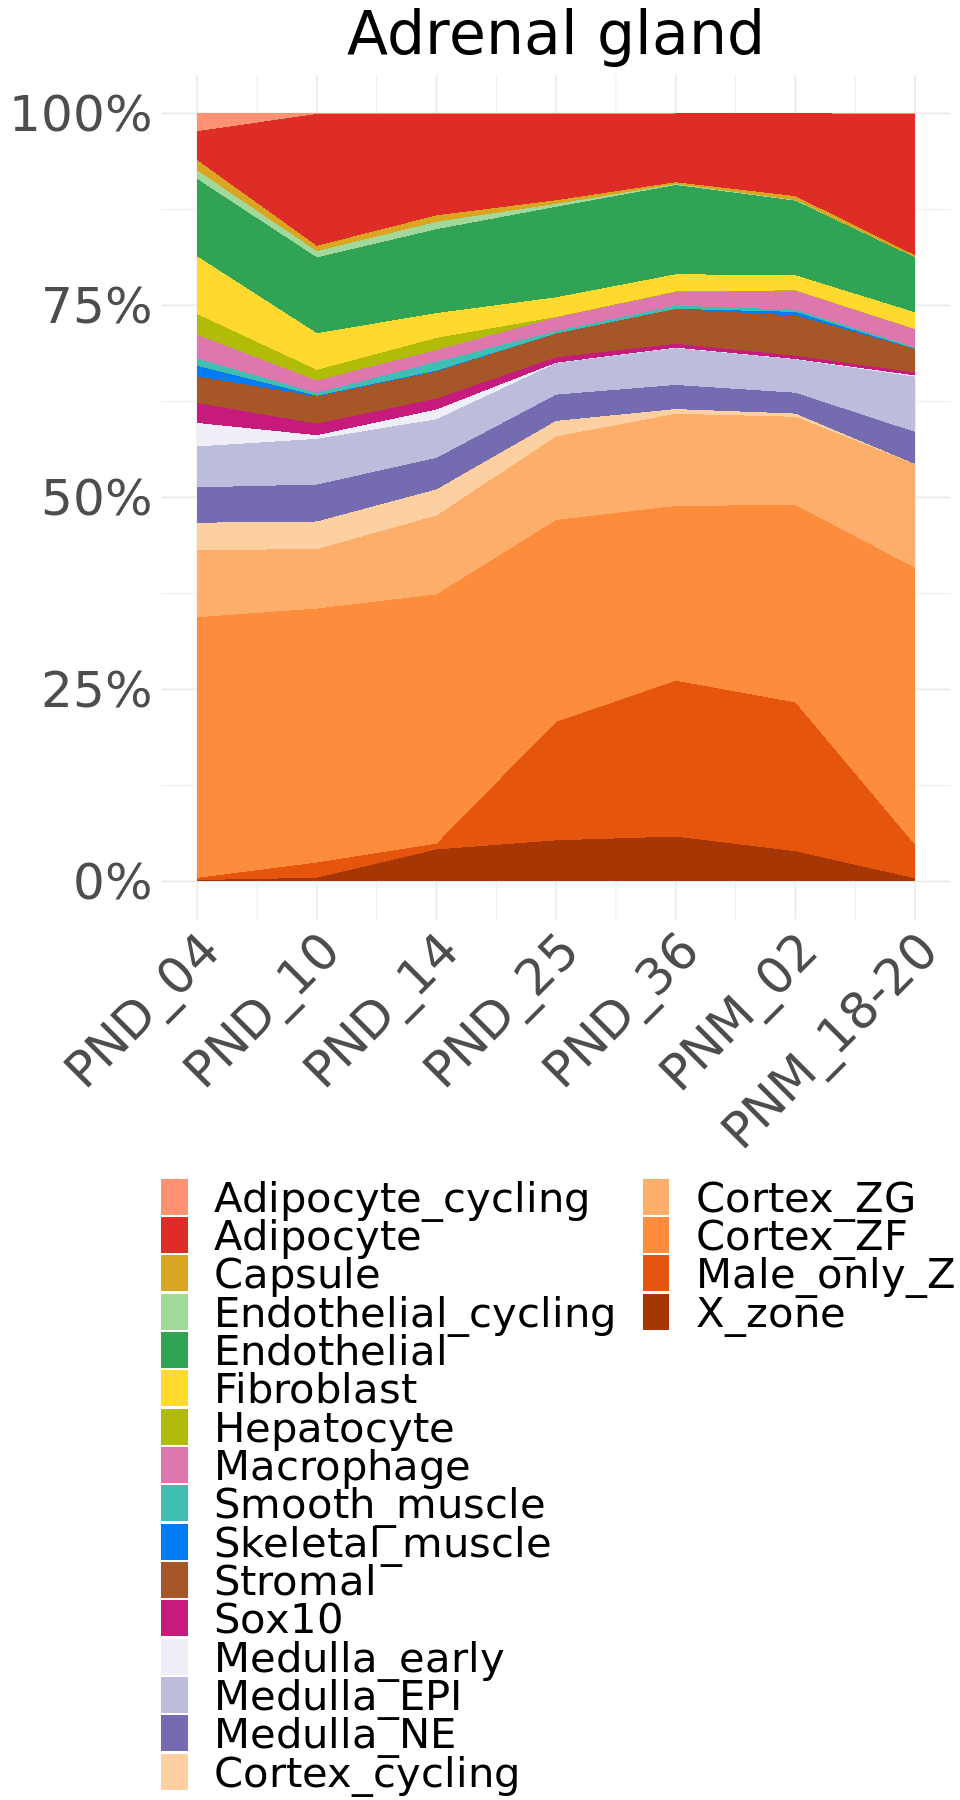

In [9]:
options(repr.plot.width = 8, repr.plot.height = 15)

ggplot(df, aes(x=timepoint, y=percentage, fill=subtypes)) + 
    scale_fill_manual(values = subtype_palette) + 
    labs(title = "Adrenal gland")+
    geom_area()  +
    scale_x_continuous(breaks = c(1,2,3,4,5,6,7),labels= c("PND_04","PND_10","PND_14",
                                                         "PND_25","PND_36","PNM_02","PNM_18-20")) +
    scale_y_continuous(labels = scales::percent,
                     limits = c(0, 1)) +
    theme_minimal()+theme(text = element_text(size = 30), plot.title = element_text(hjust = 0.5)) +
    theme(axis.text.y = element_text(size = 30), axis.text.x = element_text(size = 30, angle = 45, hjust = 1)) + 
    theme(axis.title.x = element_blank(), axis.title.y = element_blank()) +
    theme(legend.position="bottom", 
          legend.box="vertical", 
          legend.margin=margin(),
          legend.title=element_blank(),
          legend.text=element_text(size=25))+
    theme(plot.title=element_text(hjust=0.5),plot.subtitle=element_text(hjust=0.5)) + 
    guides(fill=guide_legend(nrow=16))



# Fig. S1c

In [10]:
markers = c("Acsl1","Pparg","Adipoq","Pnpla2",
            "Rspo1","Igfbp5","Wt1",
            "Tek","Flt1","Flt4","Pecam1",
            "Postn","Dcn","Col1a1","Col1a2",
            "Alb","Serpina1a","Ttr","Apoa2","Hal",
            "March1","F13a1","Csf1r","Cd86",
            "Myh11","Myl9","Acta2","Myocd",
            "Ryr1","Ttn","Myh1","Neb",
            "Pdgfra","Cyp1b1","Mgp",
            "Sox10","Mpz",
            "Chga","Th","Pnmt",
            "Cyp11b2","Dab2","Star","Cyp11a1","Cyp11b1","Nr5a1",
            "Uty","Esrrg","Hhex",
            "Akr1c18","Pik3c2g","Thrb","Runx2","Irf8","Nr3c1","Ar",
            "Top2a","Mki67")


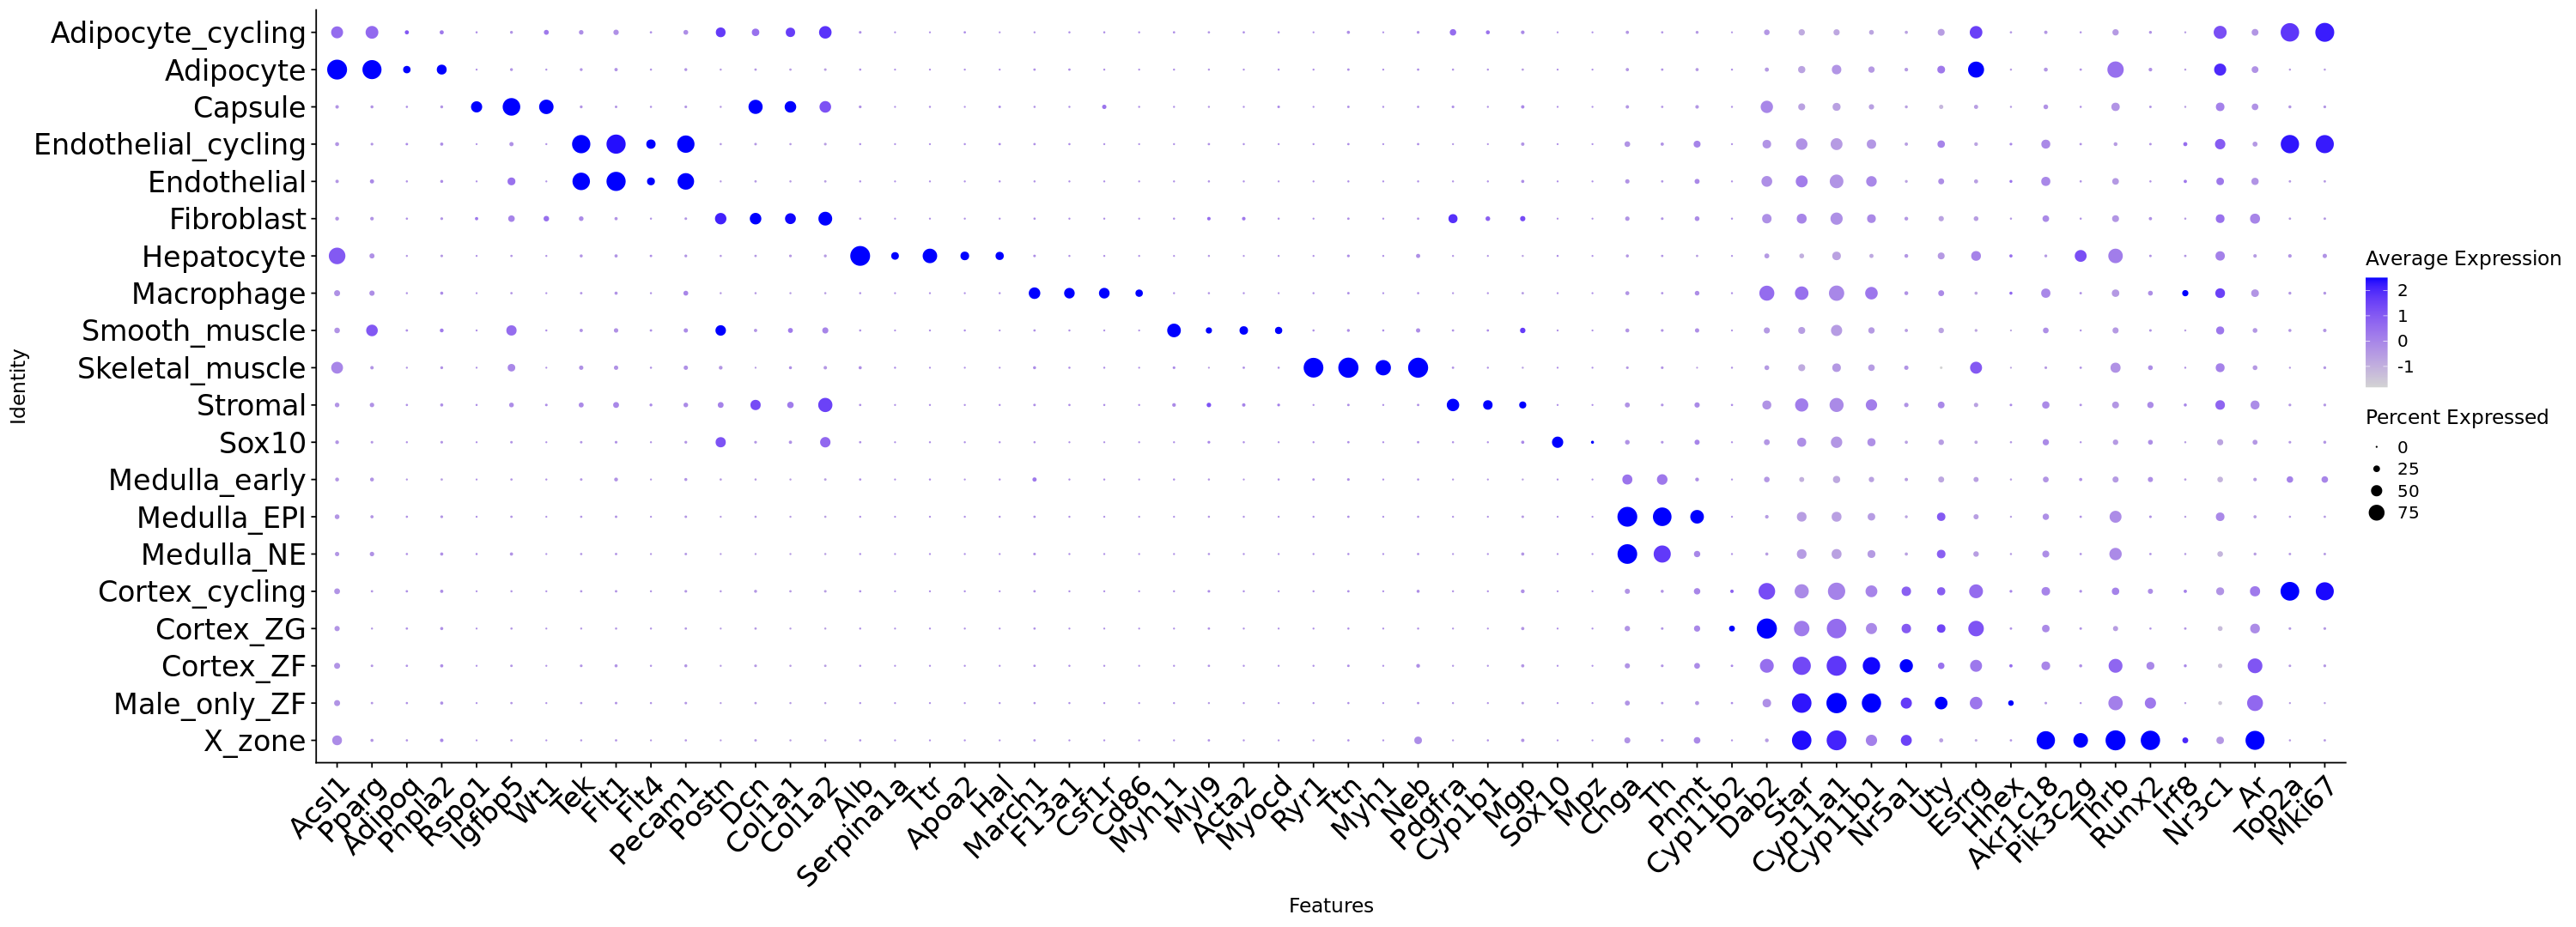

In [11]:
obj@meta.data$subtypes = factor(obj@meta.data$subtypes, levels = rev(subtype_order))

options(repr.plot.width = 25, repr.plot.height = 9)

DotPlot(obj, features = markers, group.by = "subtypes") +
    theme(axis.text.y = element_text(size = 20), 
          axis.text.x = element_text(size = 20, angle = 45, hjust = 1))


# Fig. S2a

In [12]:
tissue = "cortex"
obj = readRDS(paste0("../snrna/",tissue,"/seurat/",tissue,"_Parse_10x_integrated.rds"))


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



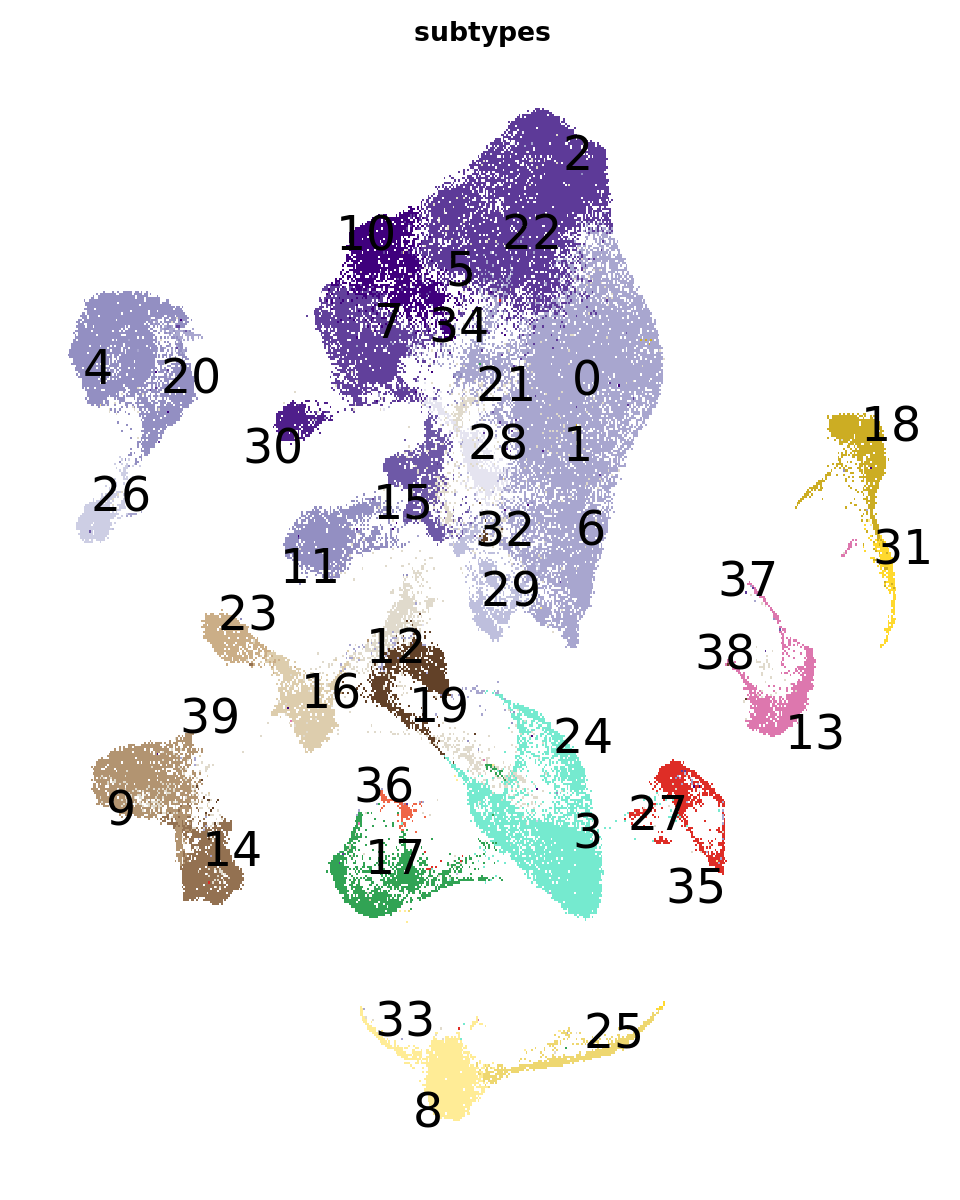

In [13]:
options(repr.plot.width = 8, repr.plot.height = 10)

cols = read.csv(paste0("../snrna/ref/",tissue,"_celltypes_colors.csv"))
cols = unique(cols[,c("subtypes","subtype_color")])
subtype_palette = cols$subtype_color
names(subtype_palette) = cols$subtypes

umap_plot = DimPlot(obj, group.by = "subtypes", label = FALSE)
umap_plot$data$seurat_clusters = obj@meta.data$seurat_clusters

LabelClusters(umap_plot, id = "seurat_clusters", size = 10) + 
    scale_color_manual(values = subtype_palette) +
    NoAxes()+ NoLegend()

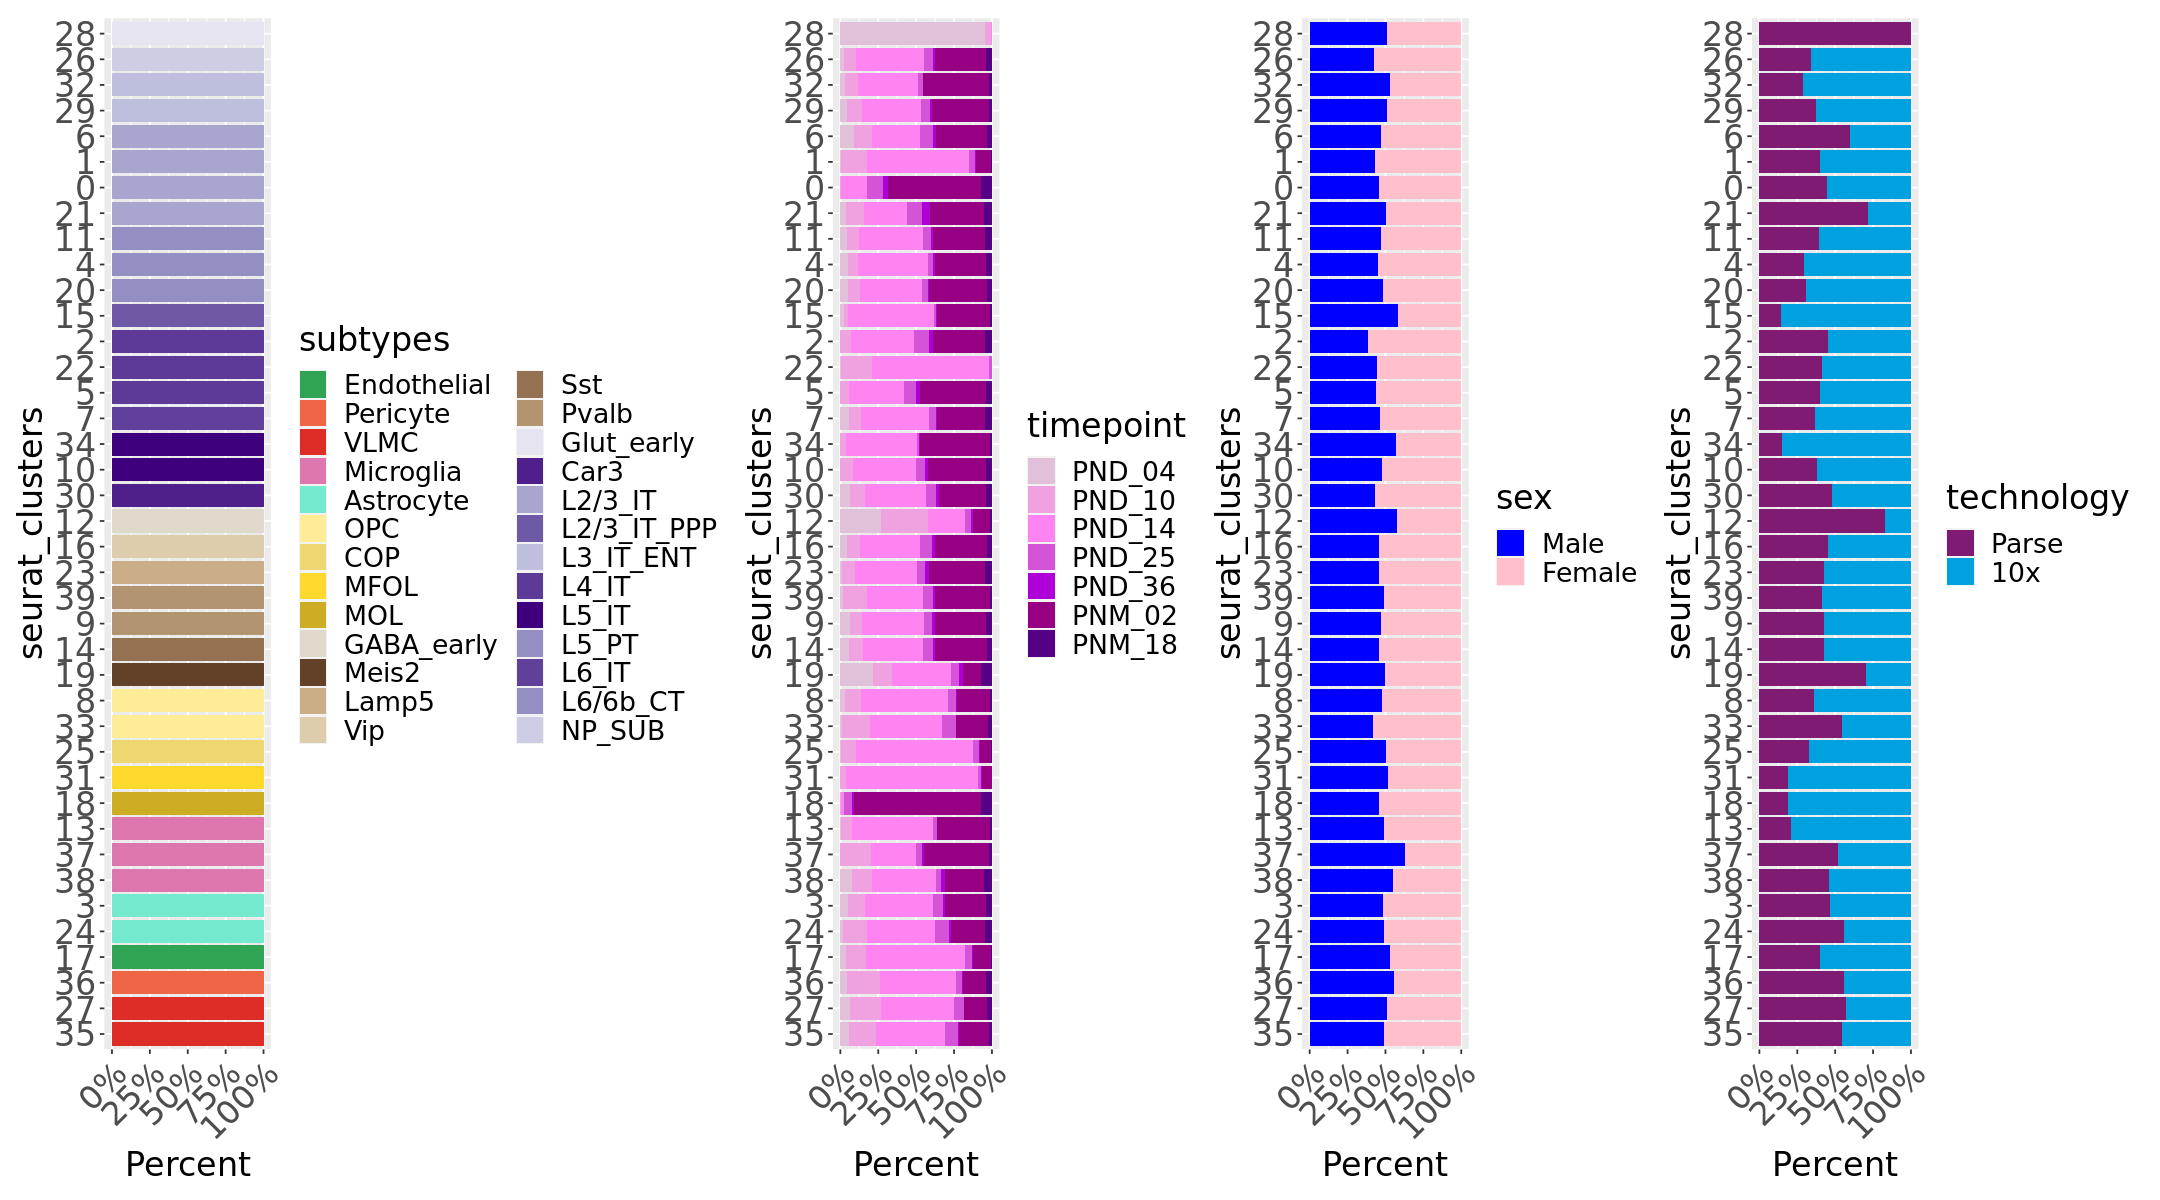

In [14]:
options(repr.plot.width = 18, repr.plot.height = 10)


order = c(28,26,32,29,6,1,0,21,11,4,20,15,2,22,5,7,34,10,30,
         12,16,23,39,9,14,19,8,33,25,31,18,13,37,38,3,24,17,36,27,35)

obj@meta.data$seurat_clusters = factor(obj@meta.data$seurat_clusters, levels = rev(order))
obj@meta.data$timepoint = factor(obj@meta.data$timepoint, levels = rev(names(tp_palette)))

p1 = ggplot(obj@meta.data, aes(x=seurat_clusters, fill=subtypes)) + geom_bar(position = "fill") + 
    scale_fill_manual(values = subtype_palette) + 
    ylab("Percent") +
    scale_y_continuous(labels = scales::percent,
                     limits = c(0, 1)) +
    theme(text = element_text(size = 20), 
          axis.text.x = element_text(size = 20, angle = 45, hjust = 1), 
          axis.text.y = element_text(size = 20)) + coord_flip()


p2 = ggplot(obj@meta.data, aes(x=seurat_clusters, fill=timepoint)) + geom_bar(position = "fill") + 
    scale_fill_manual(values = tp_palette) + 
    ylab("Percent") +
    scale_y_continuous(labels = scales::percent,
                     limits = c(0, 1)) +
    theme(text = element_text(size = 20), 
          axis.text.x = element_text(size = 20, angle = 45, hjust = 1), 
          axis.text.y = element_text(size = 20)) + coord_flip()


p3 = ggplot(obj@meta.data, aes(x=seurat_clusters, fill=sex)) + geom_bar(position = "fill") + 
    scale_fill_manual(values = sex_palette) + 
    ylab("Percent") +
    scale_y_continuous(labels = scales::percent,
                     limits = c(0, 1)) +
    theme(text = element_text(size = 20), 
          axis.text.x = element_text(size = 20, angle = 45, hjust = 1), 
          axis.text.y = element_text(size = 20)) + coord_flip()


p4 = ggplot(obj@meta.data, aes(x=seurat_clusters, fill=technology)) + geom_bar(position = "fill") + 
    scale_fill_manual(values = tech_palette) + 
    ylab("Percent") +
    scale_y_continuous(labels = scales::percent,
                     limits = c(0, 1)) +
    theme(text = element_text(size = 20), 
          axis.text.x = element_text(size = 20, angle = 45, hjust = 1), 
          axis.text.y = element_text(size = 20)) + coord_flip()


combined_plot = p1 + p2 + p3 + p4 +
  patchwork::plot_layout(ncol = 4, byrow = TRUE)
print(combined_plot)

In [15]:
obj@meta.data$seurat_clusters = factor(obj@meta.data$seurat_clusters, levels = (order))
table(obj$seurat_clusters)


  28   26   32   29    6    1    0   21   11    4   20   15    2   22    5    7 
1336 1386  650 1169 5720 8136 8505 2037 3147 6583 2078 2782 7654 1887 6054 4615 
  34   10   30   12   16   23   39    9   14   19    8   33   25   31   18   13 
 577 3496 1023 2932 2754 1624  212 4164 2843 2257 4175  590 1406  760 2581 2929 
  37   38    3   24   17   36   27   35 
 255  242 7054 1506 2746  335 1362  556 

# Fig. S2b

In [16]:
obj_parse = readRDS(paste0("../snrna/",tissue,"/seurat/",tissue,"_Parse.rds"))

df = prop_area(obj_parse)

subtype_order = c("Endothelial","Pericyte","VLMC",
          "Microglia", "Astrocyte",                               
          "GABA_early","Meis2","Lamp5","Vip","Sst","Pvalb",
          "Glut_early","Car3","L2/3_IT","L2/3_IT_PPP","L3_IT_ENT","L4_IT","L5_IT","L5_PT","L6_IT","L6/6b_CT","NP_SUB",
          "OPC","COP","MFOL","MOL")

df$subtypes = factor(df$subtypes, levels = subtype_order)



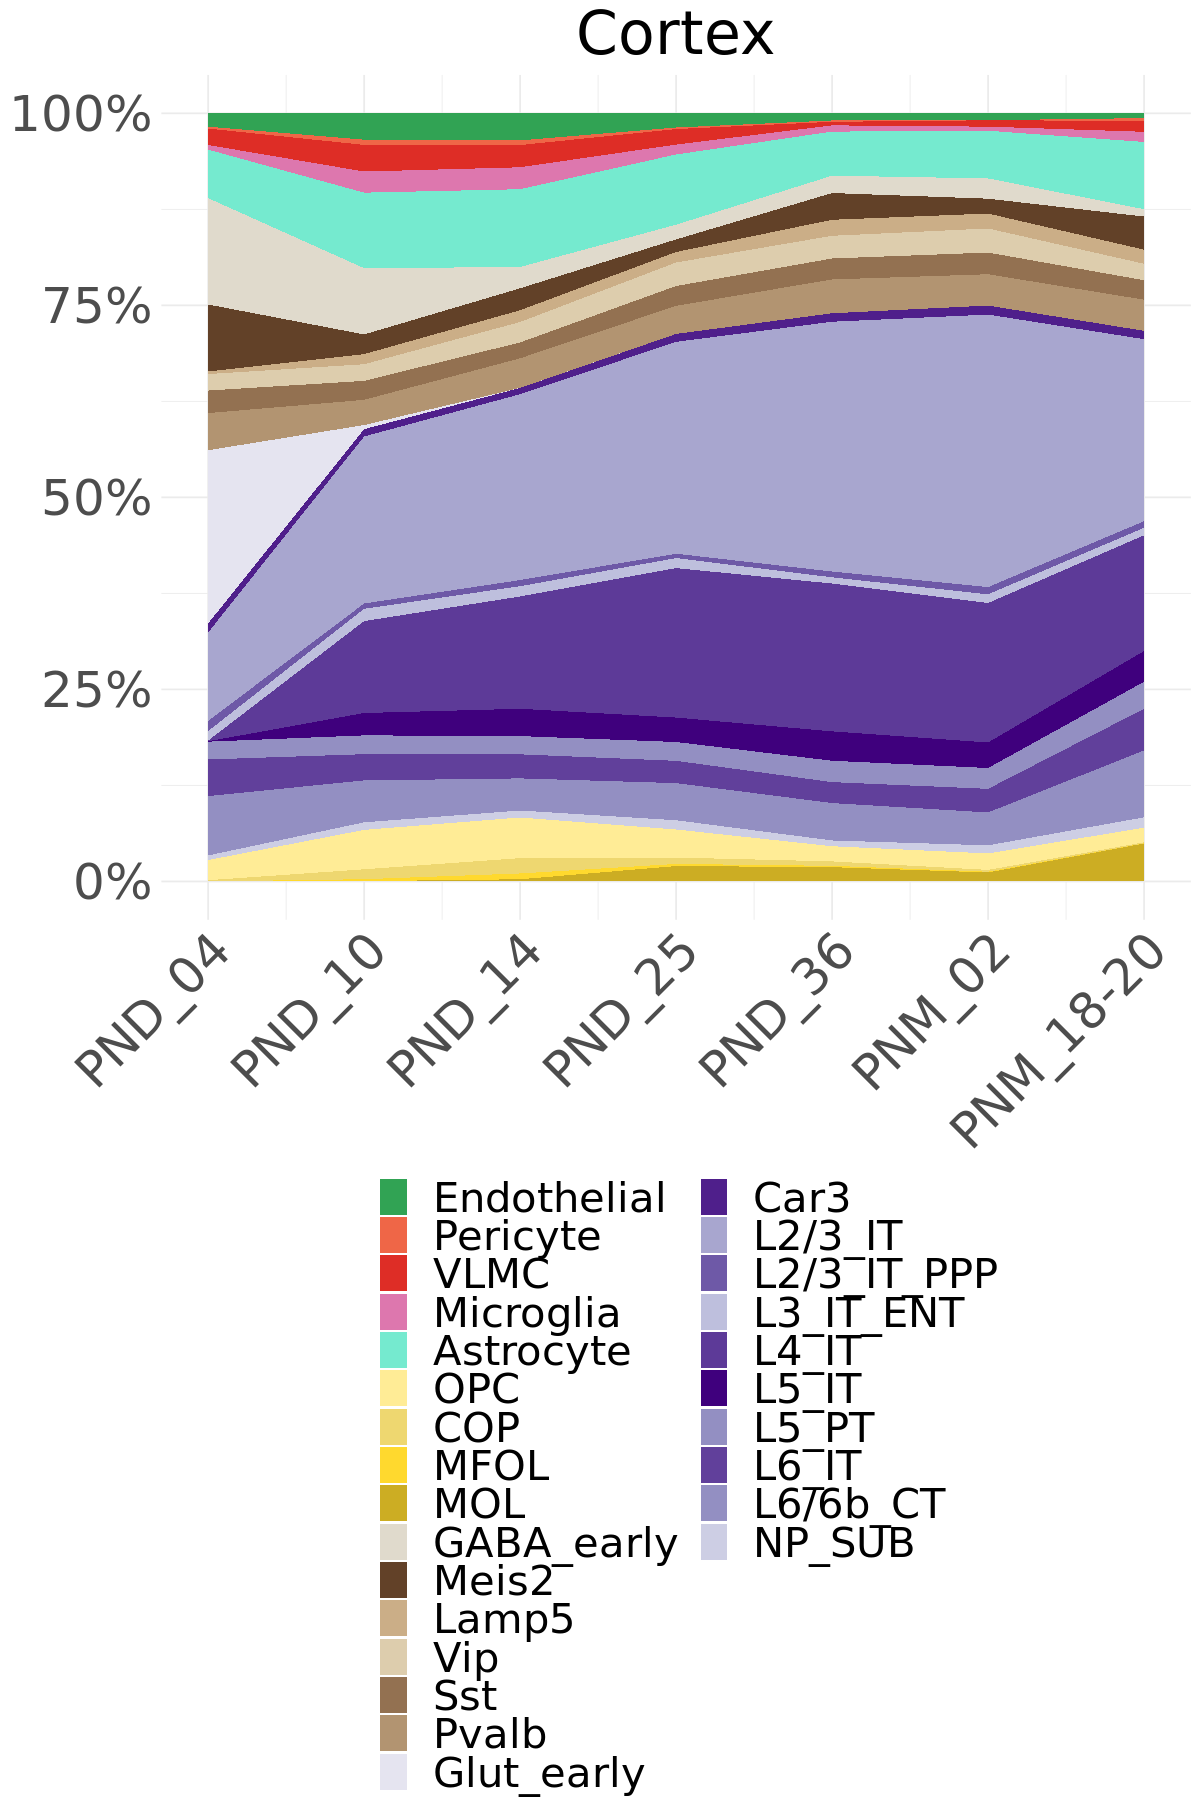

In [17]:
cols = read.csv(paste0("../snrna/ref/",tissue,"_celltypes_colors.csv"))
cols = unique(cols[,c("subtypes","subtype_color")])
col_palette = cols$subtype_color
names(col_palette) = cols$subtypes

options(repr.plot.width = 10, repr.plot.height = 15)

ggplot(df, aes(x=timepoint, y=percentage, fill=subtypes)) + 
    scale_fill_manual(values = col_palette) + 
    labs(title = "Cortex")+
    geom_area()  +
    scale_x_continuous(breaks = c(1,2,3,4,5,6,7),labels= c("PND_04","PND_10","PND_14",
                                                         "PND_25","PND_36","PNM_02","PNM_18-20")) +
    scale_y_continuous(labels = scales::percent,
                     limits = c(0, 1)) +
    theme_minimal()+theme(text = element_text(size = 30), plot.title = element_text(hjust = 0.5)) +
    theme(axis.text.y = element_text(size = 30), axis.text.x = element_text(size = 30, angle = 45, hjust = 1)) + 
    theme(axis.title.x = element_blank(), axis.title.y = element_blank()) +
    theme(legend.position="bottom", 
          legend.box="vertical", 
          legend.margin=margin(),
          legend.title=element_blank(),
          legend.text=element_text(size=25))+
    theme(plot.title=element_text(hjust=0.5),plot.subtitle=element_text(hjust=0.5)) + 
    guides(fill=guide_legend(nrow=16))



# Fig. S2c

In [18]:
markers = c("Flt1","Vwf","Itm2a","Ptprb","Cldn5",
            "Kcnj8","Anpep","Higd1b","Vtn","Cox4i2",
            "Dcn","Slc6a13","Ptgds","Igf2",
            "Cx3cr1","Csf1r","Itgam","P2ry12","Ctss","Cd83",
            "Gfap","Slc1a2","Clu","Cpe","Aqp4",
            "Snap25","Mir124a-1hg","Map2","Slc17a7",
            "Camk2a","Slc32a1",
            "Gad1","Gad2","Meis2",
            "Lamp5","Vip","Sst","Pvalb","Car3",
            "Oprk1","Otof","Calb1","Cux1","Cux2",
            "Nr4a2","Pld5","Scube1",
            "Hs3st2","Vipr1",
            "Pde1a","Rprm","Rell1","Nxph3",
            "Hs3st4","Tle4","Thsd7b",
            "Pdgfra","Cspg4","Nkx2-2",
            "Mobp","Mbp","Mag","Mog","Plp1","Opalin")



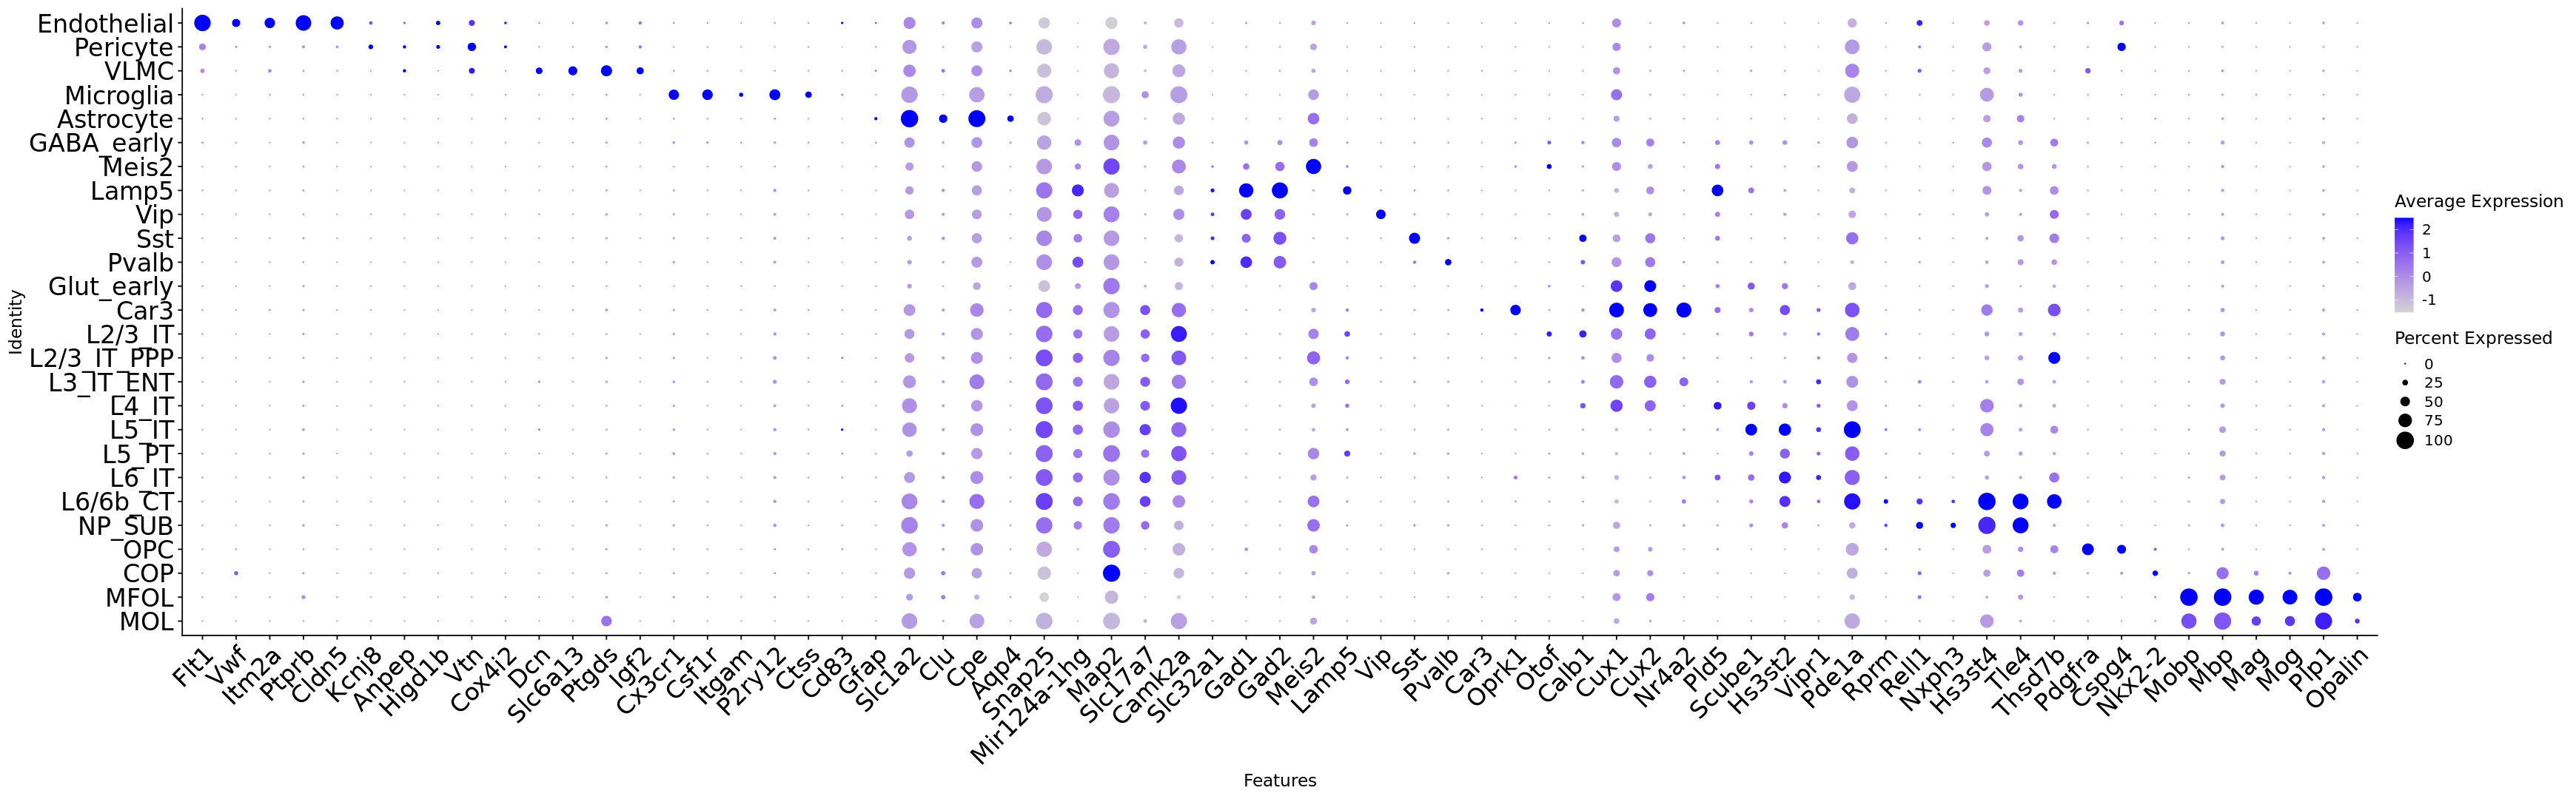

In [19]:
obj@meta.data$subtypes = factor(obj@meta.data$subtypes, levels = rev(subtype_order))

options(repr.plot.width = 29, repr.plot.height = 9)

DotPlot(obj, features = markers, group.by = "subtypes") +
    theme(axis.text.y = element_text(size = 20), 
          axis.text.x = element_text(size = 20, angle = 45, hjust = 1))


# Fig. S3a

In [44]:
tissue = "hippocampus"
obj = readRDS(paste0("../snrna/",tissue,"/seurat/",tissue,"_Parse_10x_integrated.rds"))


In [45]:
order = c(30,33,3,8,'16_1',17,7,9,0,25,1,4,23,31,19,32,5,26,21,'22_1',
          18,13,20,'10_1','10_0','22_0',6,34,15,11,2,28,'16_0',12,24,14,29,35,27)

obj@meta.data$sub.cluster = factor(obj@meta.data$sub.cluster, levels = rev(order))


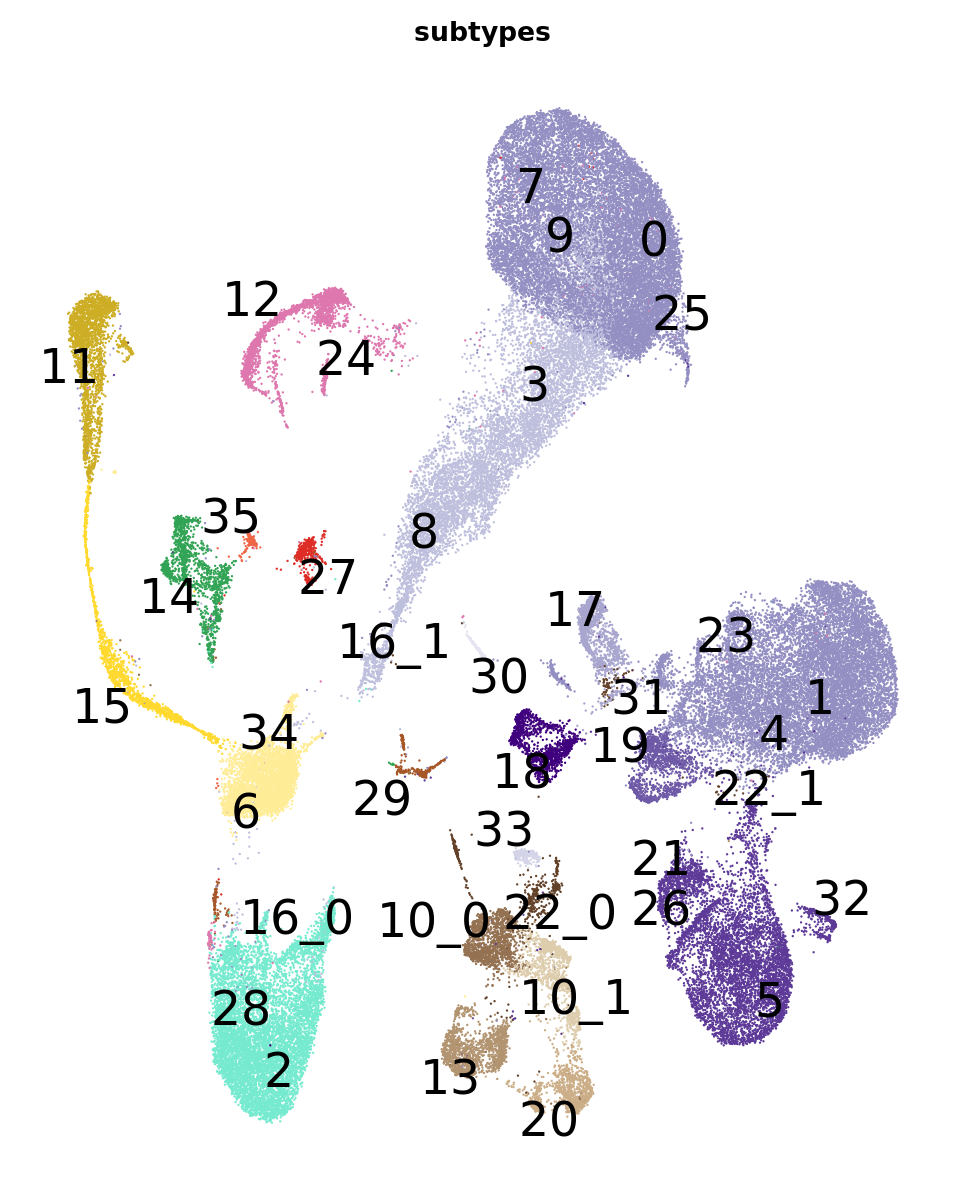

In [53]:
options(repr.plot.width = 8, repr.plot.height = 10)

cols = read.csv(paste0("../snrna/ref/",tissue,"_celltypes_colors.csv"))
cols = unique(cols[,c("subtypes","subtype_color")])
subtype_palette = cols$subtype_color
names(subtype_palette) = cols$subtypes

umap_plot = DimPlot(obj, group.by = "subtypes", label = FALSE)
umap_plot$data$sub.cluster = obj@meta.data$sub.cluster

LabelClusters(umap_plot, id = "sub.cluster", size = 10) + 
    scale_color_manual(values = subtype_palette) +
    NoAxes()+ NoLegend()

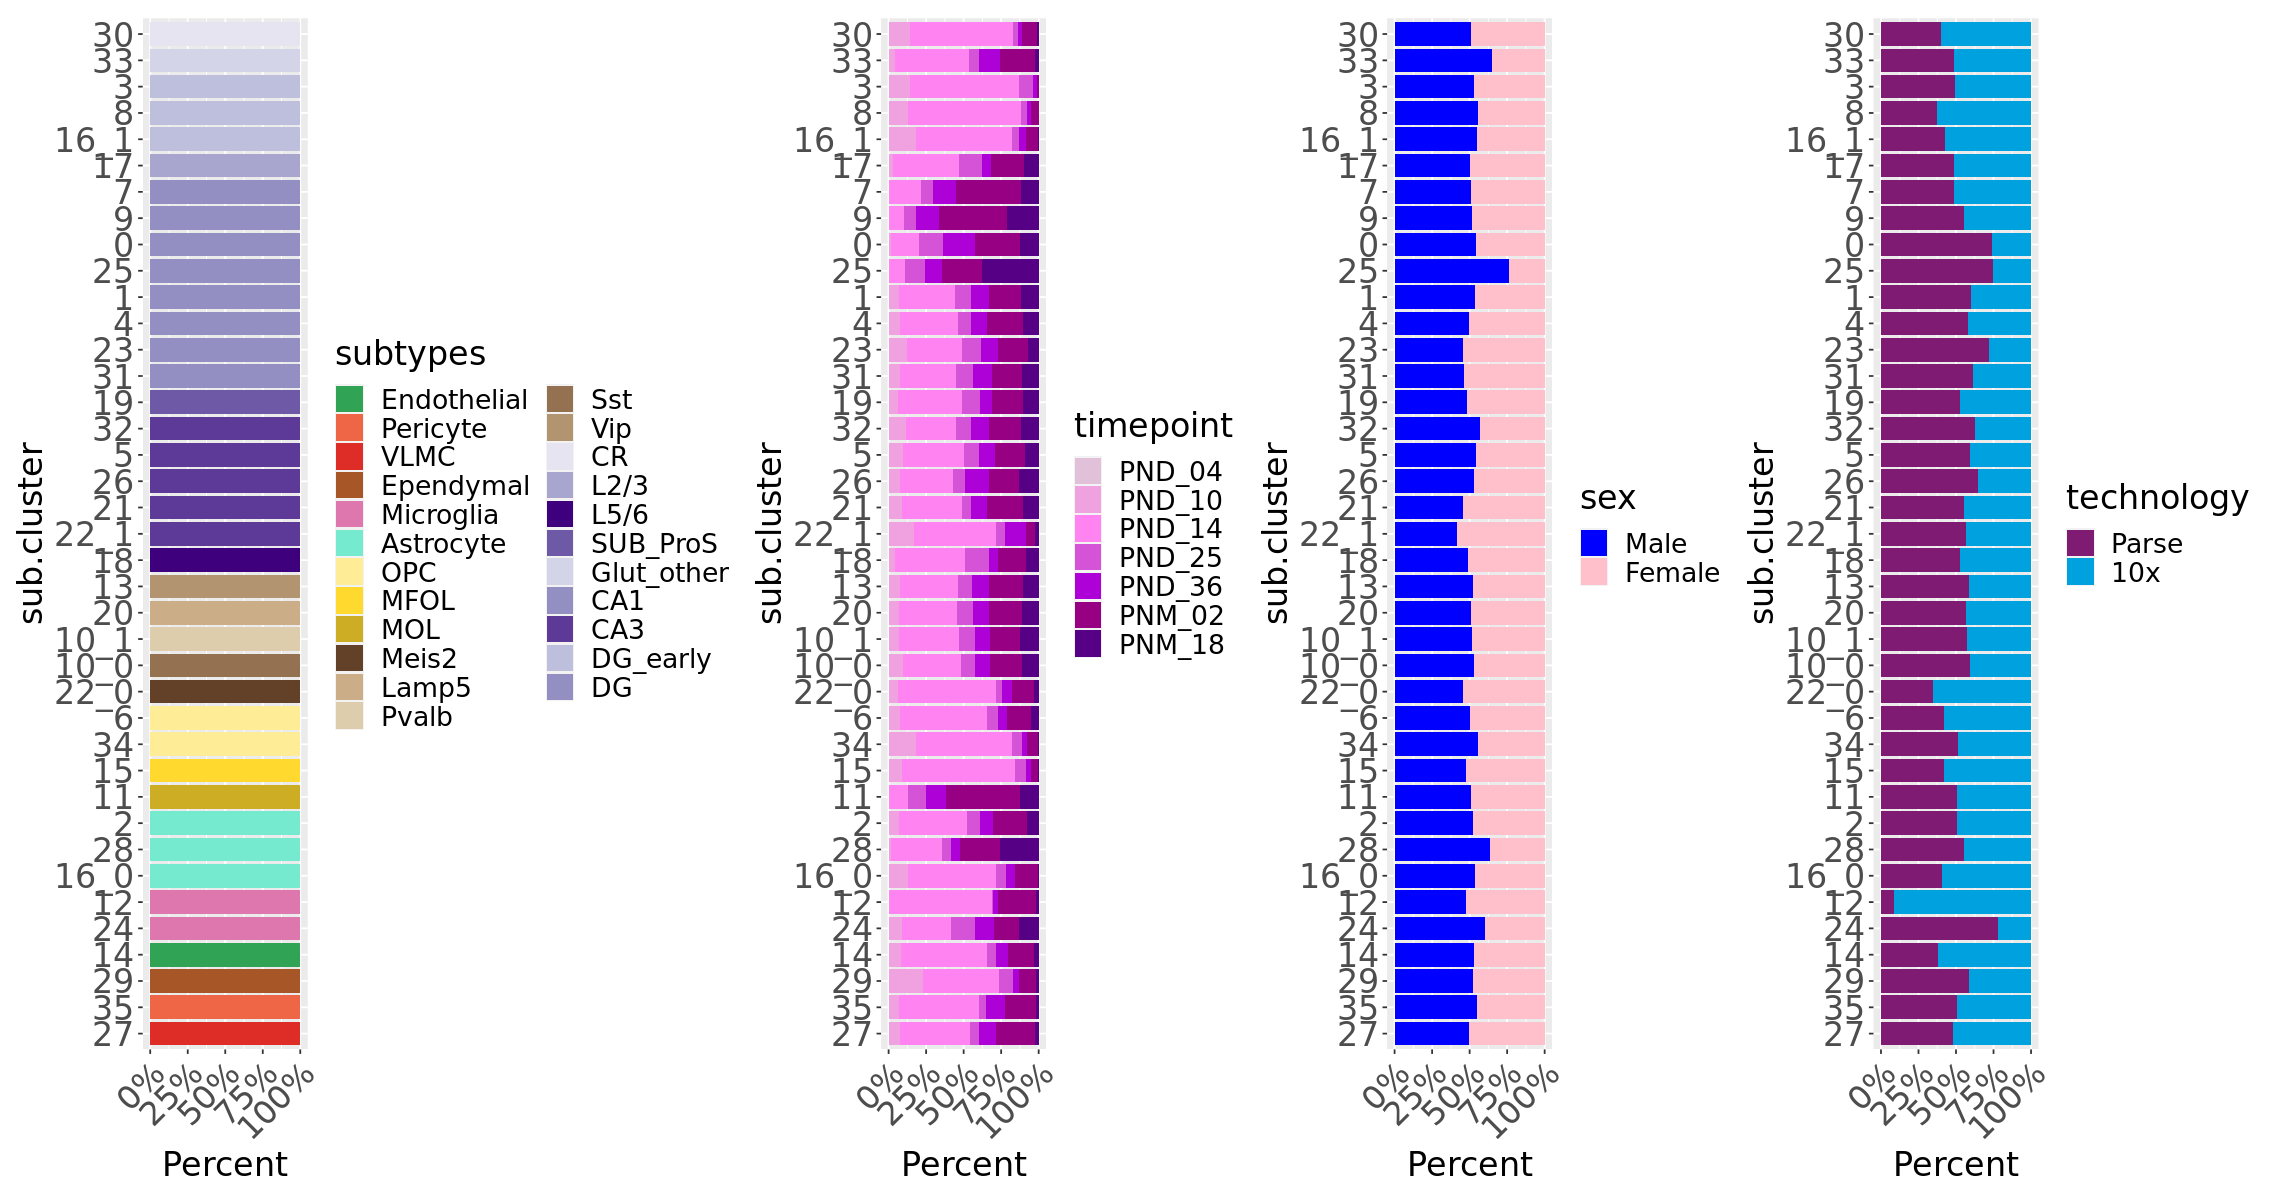

In [47]:
options(repr.plot.width = 19, repr.plot.height = 10)


obj@meta.data$timepoint = factor(obj@meta.data$timepoint, levels = rev(names(tp_palette)))

p1 = ggplot(obj@meta.data, aes(x=sub.cluster, fill=subtypes)) + geom_bar(position = "fill") + 
    scale_fill_manual(values = subtype_palette) + 
    ylab("Percent") +
    scale_y_continuous(labels = scales::percent,
                     limits = c(0, 1)) +
    theme(text = element_text(size = 20), 
          axis.text.x = element_text(size = 20, angle = 45, hjust = 1), 
          axis.text.y = element_text(size = 20)) + coord_flip()


p2 = ggplot(obj@meta.data, aes(x=sub.cluster, fill=timepoint)) + geom_bar(position = "fill") + 
    scale_fill_manual(values = tp_palette) + 
    ylab("Percent") +
    scale_y_continuous(labels = scales::percent,
                     limits = c(0, 1)) +
    theme(text = element_text(size = 20), 
          axis.text.x = element_text(size = 20, angle = 45, hjust = 1), 
          axis.text.y = element_text(size = 20)) + coord_flip()


p3 = ggplot(obj@meta.data, aes(x=sub.cluster, fill=sex)) + geom_bar(position = "fill") + 
    scale_fill_manual(values = sex_palette) + 
    ylab("Percent") +
    scale_y_continuous(labels = scales::percent,
                     limits = c(0, 1)) +
    theme(text = element_text(size = 20), 
          axis.text.x = element_text(size = 20, angle = 45, hjust = 1), 
          axis.text.y = element_text(size = 20)) + coord_flip()


p4 = ggplot(obj@meta.data, aes(x=sub.cluster, fill=technology)) + geom_bar(position = "fill") + 
    scale_fill_manual(values = tech_palette) + 
    ylab("Percent") +
    scale_y_continuous(labels = scales::percent,
                     limits = c(0, 1)) +
    theme(text = element_text(size = 20), 
          axis.text.x = element_text(size = 20, angle = 45, hjust = 1), 
          axis.text.y = element_text(size = 20)) + coord_flip()


combined_plot = p1 + p2 + p3 + p4 +
  patchwork::plot_layout(ncol = 4, byrow = TRUE)
print(combined_plot)

In [48]:
obj@meta.data$sub.cluster = factor(obj@meta.data$sub.cluster, levels = (order))
table(obj$sub.cluster)


  30   33    3    8 16_1   17    7    9    0   25    1    4   23   31   19   32 
 387  235 5091 3729  467 1353 3831 3428 8345  651 7507 4831  860  321 1298  299 
   5   26   21 22_1   18   13   20 10_1 10_0 22_0    6   34   15   11    2   28 
4509  613  961  253 1337 1512 1060 1128 1407  614 3995  213 1480 2443 7024  495 
16_0   12   24   14   29   35   27 
 955 2051  797 1504  428  211  544 

# Fig. S3b

In [49]:
obj_parse = readRDS(paste0("../snrna/",tissue,"/seurat/",tissue,"_Parse.rds"))

df = prop_area(obj_parse)

subtype_order  = c("Endothelial","Pericyte", "VLMC","Ependymal","Microglia","Astrocyte",
                 "Meis2","Lamp5","Vip","Sst","Pvalb",
                 "CR","L2/3","L5/6","SUB_ProS","Glut_other","CA1","CA3",
                 "DG_early","DG",
                 "OPC","MFOL", "MOL")

df$subtypes = factor(df$subtypes, levels = subtype_order)


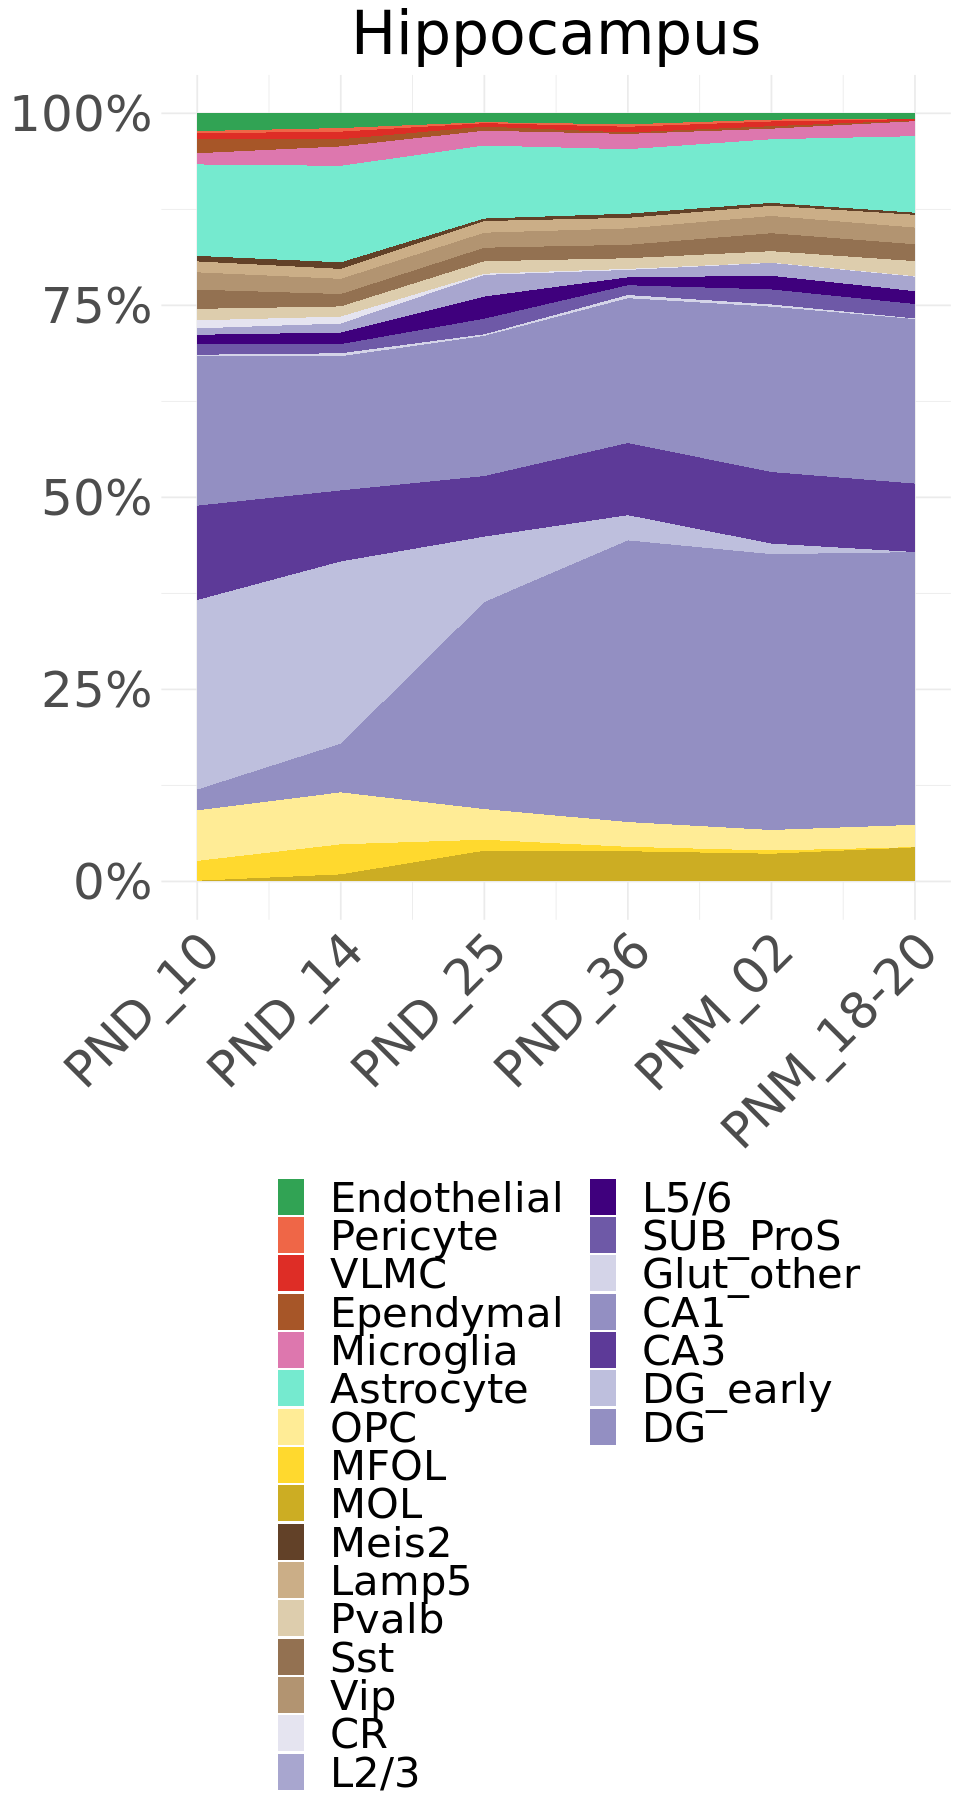

In [50]:
cols = read.csv(paste0("../snrna/ref/",tissue,"_celltypes_colors.csv"))
cols = unique(cols[,c("subtypes","subtype_color")])
col_palette = cols$subtype_color
names(col_palette) = cols$subtypes

options(repr.plot.width = 8, repr.plot.height = 15)

ggplot(df, aes(x=timepoint, y=percentage, fill=subtypes)) + 
    scale_fill_manual(values = col_palette) + 
    labs(title = "Hippocampus")+
    geom_area()  +
    scale_x_continuous(breaks = c(1,2,3,4,5,6),labels= c("PND_10","PND_14",
                                                         "PND_25","PND_36","PNM_02","PNM_18-20")) +
    scale_y_continuous(labels = scales::percent,
                     limits = c(0, 1)) +
    theme_minimal()+theme(text = element_text(size = 30), plot.title = element_text(hjust = 0.5)) +
    theme(axis.text.y = element_text(size = 30), axis.text.x = element_text(size = 30, angle = 45, hjust = 1)) + 
    theme(axis.title.x = element_blank(), axis.title.y = element_blank()) +
    theme(legend.position="bottom", 
          legend.box="vertical", 
          legend.margin=margin(),
          legend.title=element_blank(),
          legend.text=element_text(size=25))+
    theme(plot.title=element_text(hjust=0.5),plot.subtitle=element_text(hjust=0.5)) + 
    guides(fill=guide_legend(nrow=16))



# Fig. S3c

In [51]:
markers = c("Flt1","Vwf","Itm2a","Ptprb","Cldn5",
            "Kcnj8","Anpep","Higd1b","Vtn","Cox4i2",
            "Dcn","Slc6a13","Ptgds","Igf2",
            "Cx3cr1","Csf1r","Itgam","P2ry12","Ctss","Cd83",
            "Gfap","Slc1a2","Clu","Cpe","Aqp4",
            "Prox1","Dcx","Calb1",
            "Snap25","Mir124a-1hg","Map2","Slc17a7",
            "Camk2a","Slc32a1",
            "Gad1","Gad2","Meis2",
            "Lamp5","Vip","Sst","Pvalb","Car3",
            "Oprk1","Otof","Cux1","Cux2",
            "Nr4a2","Pld5","Scube1",
            "Hs3st2","Vipr1",
            "Pde1a","Rprm","Rell1","Nxph3",
            "Hs3st4","Tle4","Thsd7b",
            "Pdgfra","Cspg4","Nkx2-2",
            "Mobp","Mbp","Mag","Mog","Plp1","Opalin")



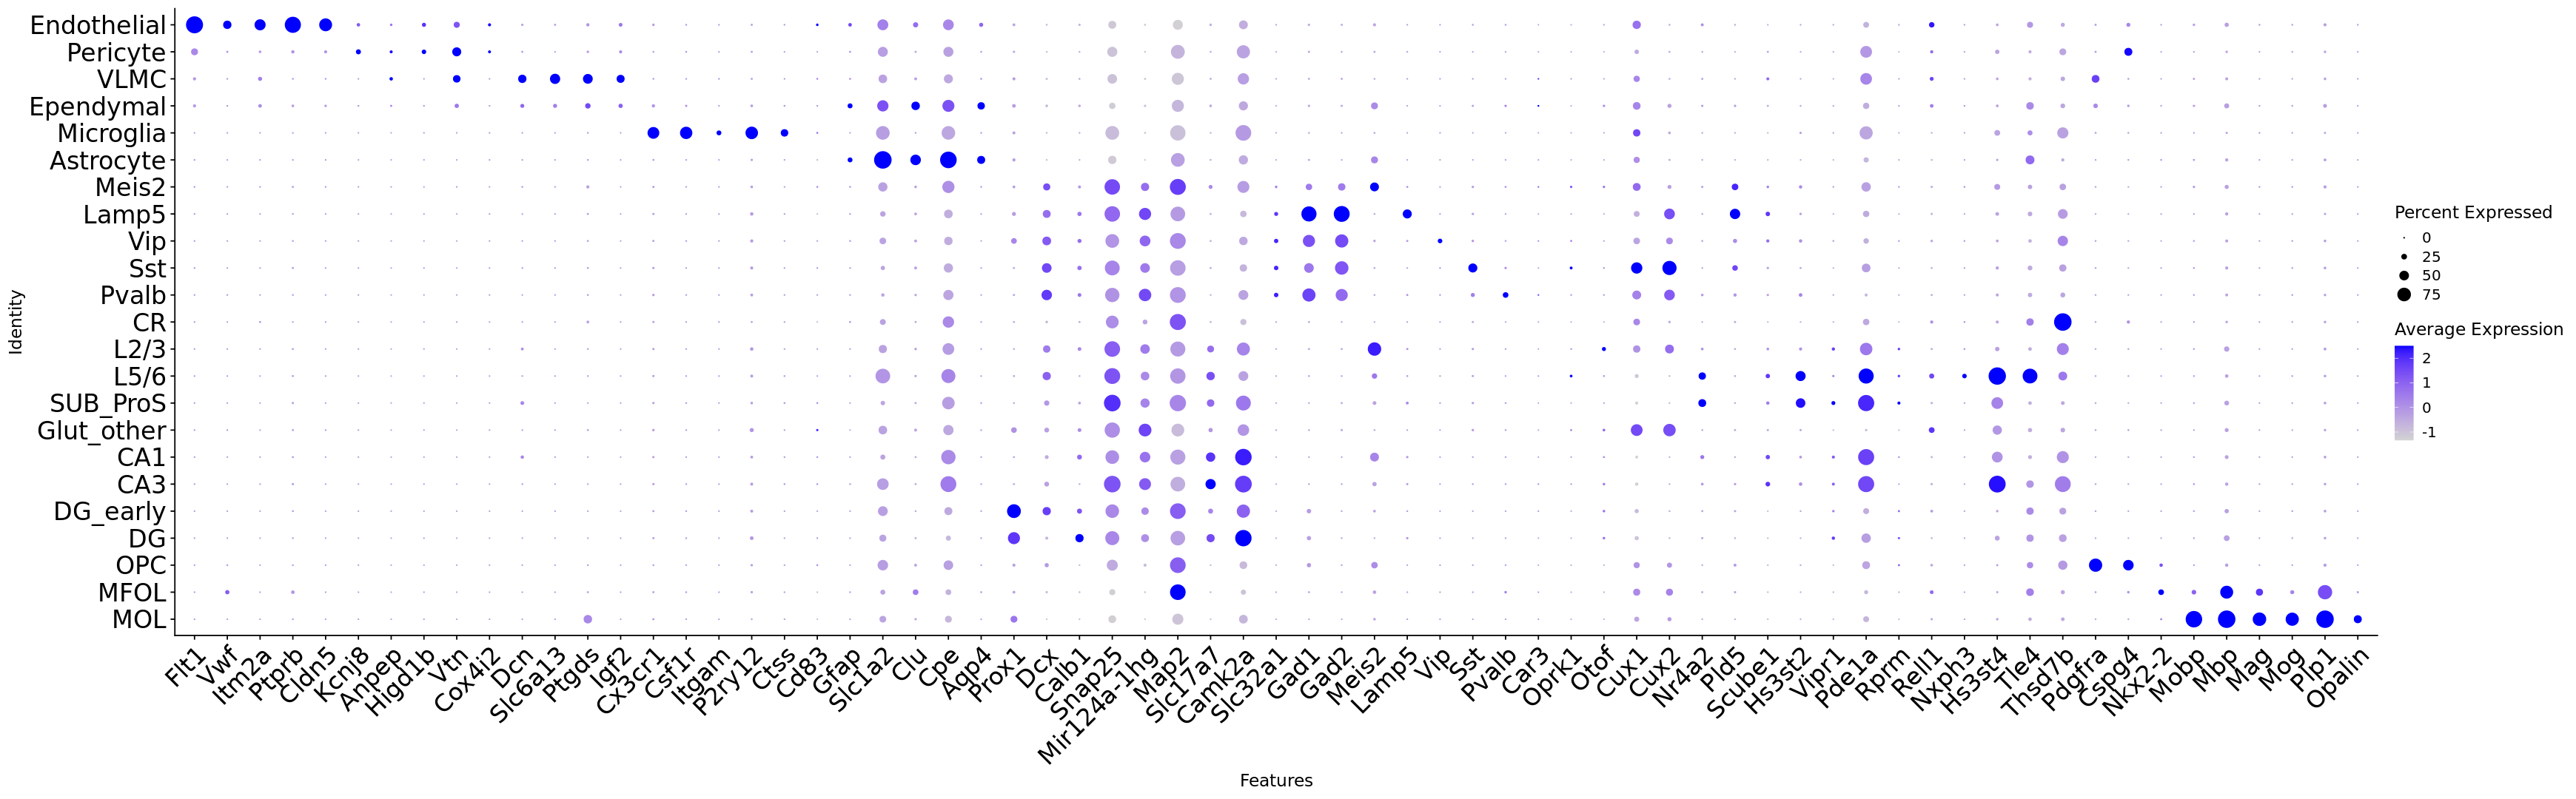

In [52]:
obj@meta.data$subtypes = factor(obj@meta.data$subtypes, levels = rev(subtype_order))

options(repr.plot.width = 29, repr.plot.height = 9)

DotPlot(obj, features = markers, group.by = "subtypes") +
    theme(axis.text.y = element_text(size = 20), 
          axis.text.x = element_text(size = 20, angle = 45, hjust = 1))


# Fig. S4a

In [22]:
tissue = "heart"

obj = readRDS(paste0("../snrna/",tissue,"/seurat/",tissue,"_Parse_10x_integrated.rds"))


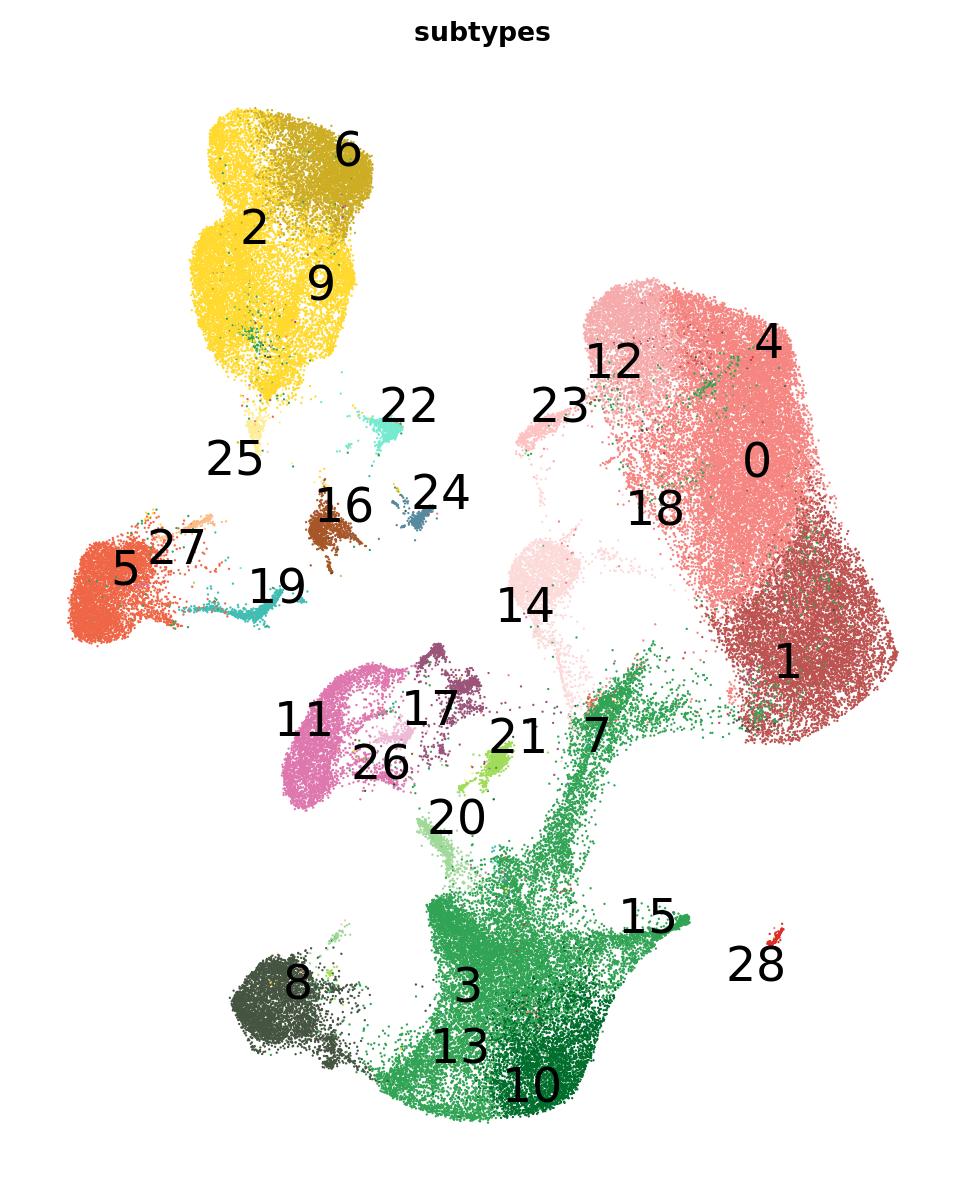

In [23]:
options(repr.plot.width = 8, repr.plot.height = 10)

cols = read.csv(paste0("../snrna/ref/",tissue,"_celltypes_colors.csv"))
cols = unique(cols[,c("subtypes","subtype_color")])
subtype_palette = cols$subtype_color
names(subtype_palette) = cols$subtypes

umap_plot = DimPlot(obj, group.by = "subtypes", label = FALSE)
umap_plot$data$seurat_clusters = obj@meta.data$seurat_clusters

LabelClusters(umap_plot, id = "seurat_clusters", size = 10) + 
    scale_color_manual(values = subtype_palette) +
    NoAxes()+ NoLegend()

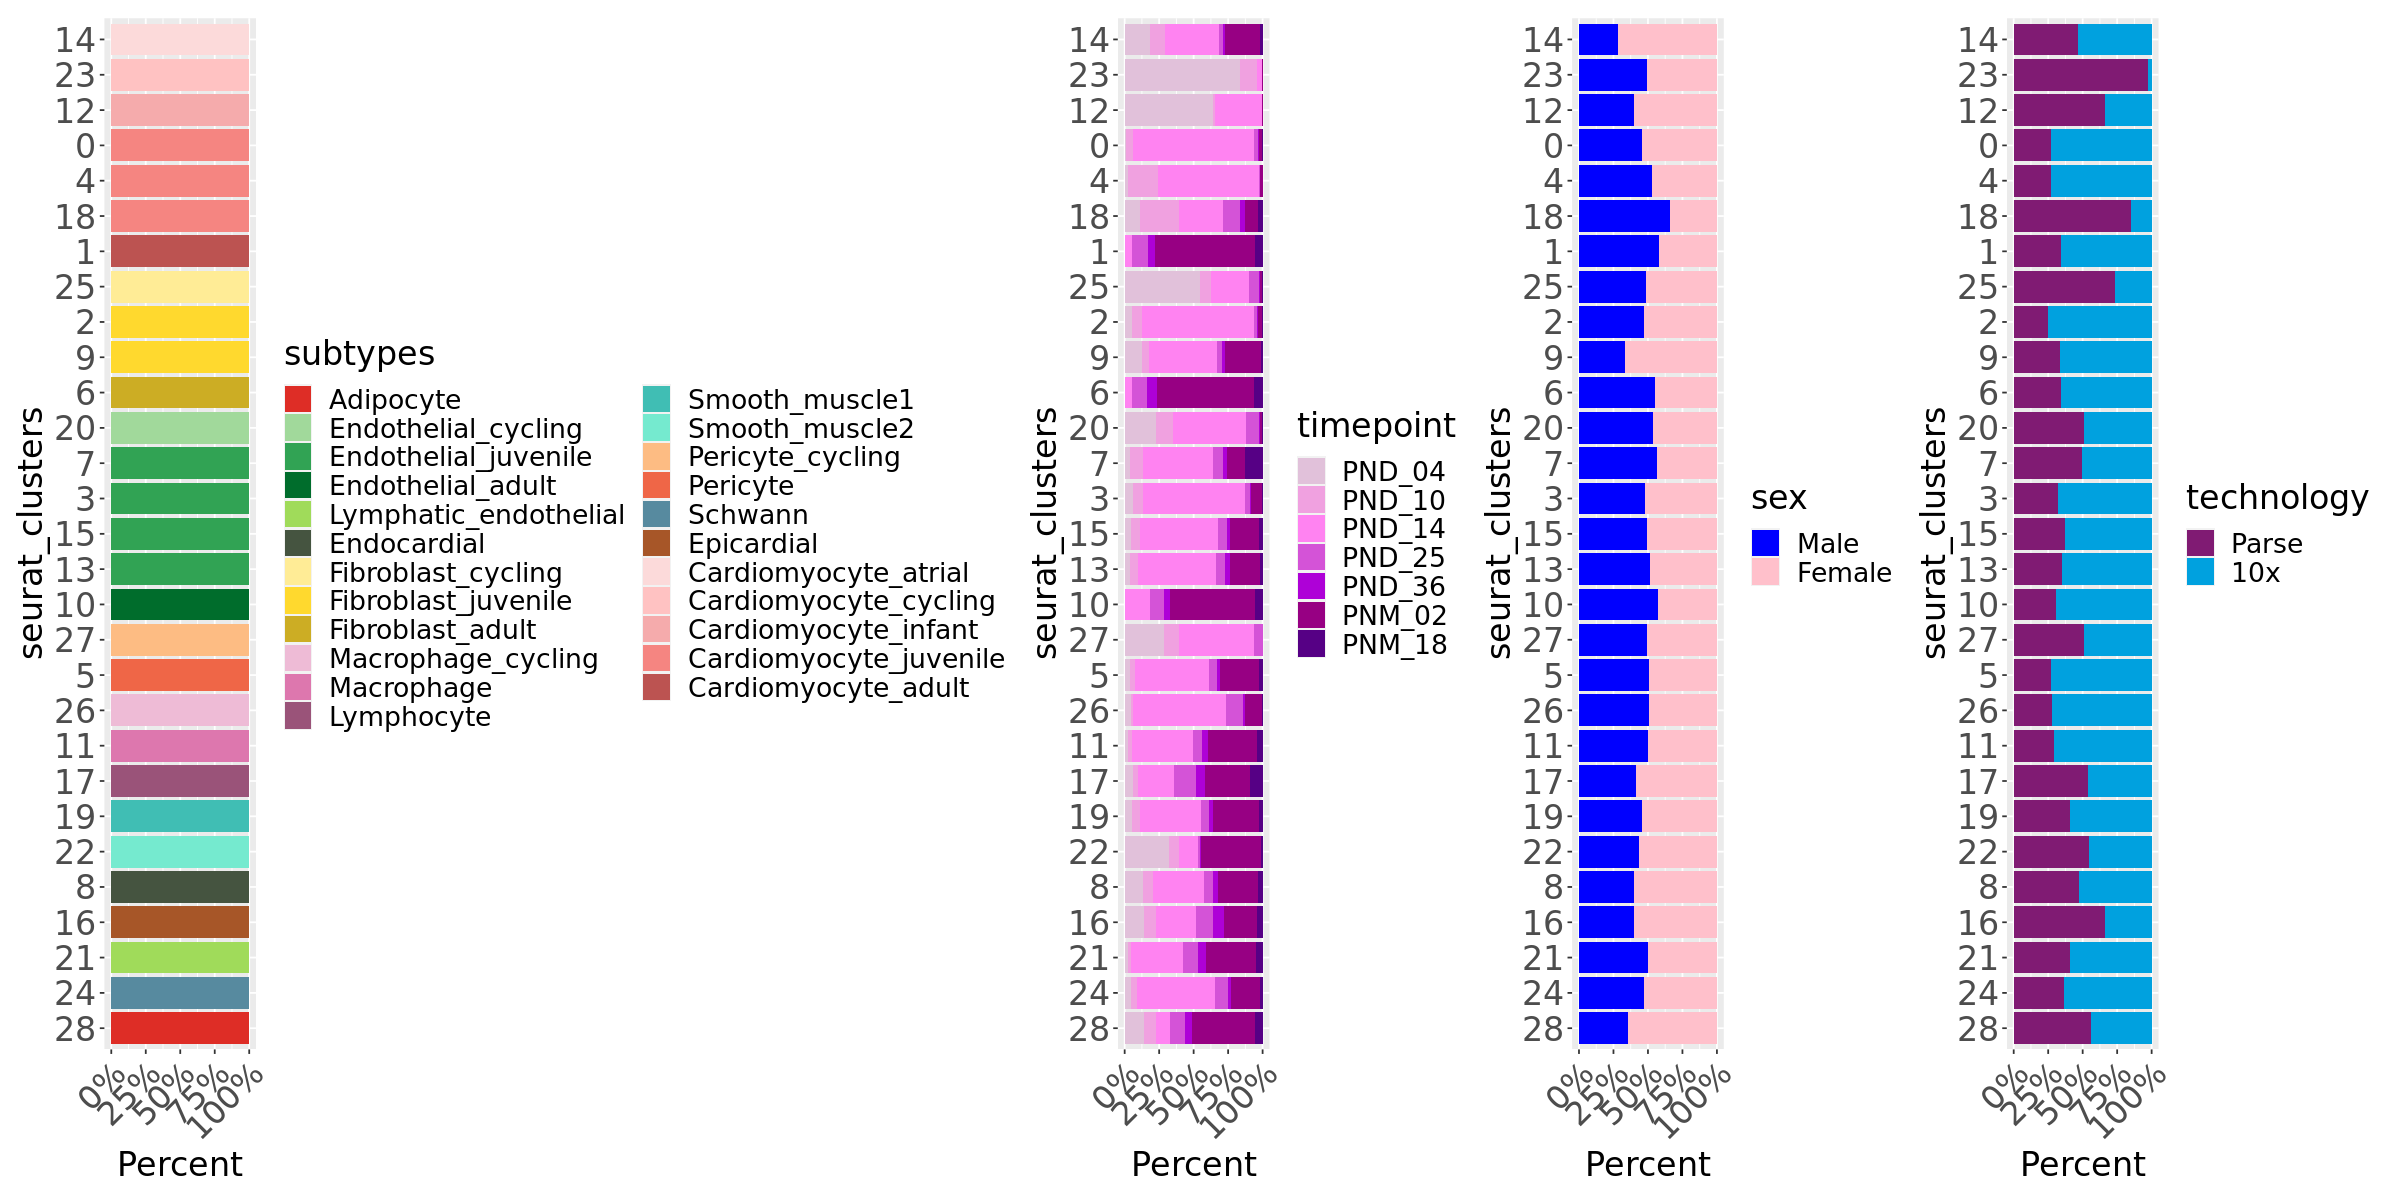

In [24]:
options(repr.plot.width = 20, repr.plot.height = 10)


order = c(14,23,12,0,4,18,1,25,2,9,6,20,7,3,15,
          13,10,27,5,26,11,17,19,22,8,16,21,24,28)

obj@meta.data$seurat_clusters = factor(obj@meta.data$seurat_clusters, levels = rev(order))
obj@meta.data$timepoint = factor(obj@meta.data$timepoint, levels = rev(names(tp_palette)))

p1 = ggplot(obj@meta.data, aes(x=seurat_clusters, fill=subtypes)) + geom_bar(position = "fill") + 
    scale_fill_manual(values = subtype_palette) + 
    ylab("Percent") +
    scale_y_continuous(labels = scales::percent,
                     limits = c(0, 1)) +
    theme(text = element_text(size = 20), 
          axis.text.x = element_text(size = 20, angle = 45, hjust = 1), 
          axis.text.y = element_text(size = 20)) + coord_flip()


p2 = ggplot(obj@meta.data, aes(x=seurat_clusters, fill=timepoint)) + geom_bar(position = "fill") + 
    scale_fill_manual(values = tp_palette) + 
    ylab("Percent") +
    scale_y_continuous(labels = scales::percent,
                     limits = c(0, 1)) +
    theme(text = element_text(size = 20), 
          axis.text.x = element_text(size = 20, angle = 45, hjust = 1), 
          axis.text.y = element_text(size = 20)) + coord_flip()


p3 = ggplot(obj@meta.data, aes(x=seurat_clusters, fill=sex)) + geom_bar(position = "fill") + 
    scale_fill_manual(values = sex_palette) + 
    ylab("Percent") +
    scale_y_continuous(labels = scales::percent,
                     limits = c(0, 1)) +
    theme(text = element_text(size = 20), 
          axis.text.x = element_text(size = 20, angle = 45, hjust = 1), 
          axis.text.y = element_text(size = 20)) + coord_flip()


p4 = ggplot(obj@meta.data, aes(x=seurat_clusters, fill=technology)) + geom_bar(position = "fill") + 
    scale_fill_manual(values = tech_palette) + 
    ylab("Percent") +
    scale_y_continuous(labels = scales::percent,
                     limits = c(0, 1)) +
    theme(text = element_text(size = 20), 
          axis.text.x = element_text(size = 20, angle = 45, hjust = 1), 
          axis.text.y = element_text(size = 20)) + coord_flip()


combined_plot = p1 + p2 + p3 + p4 +
  patchwork::plot_layout(ncol = 4, byrow = TRUE)
print(combined_plot)

In [25]:
obj@meta.data$seurat_clusters = factor(obj@meta.data$seurat_clusters, levels = (order))
table(obj$seurat_clusters)


  14   23   12    0    4   18    1   25    2    9    6   20    7    3   15   13 
2425  541 3982 9625 7054 1022 9231  347 7888 4434 5116  791 5092 7266 1617 2922 
  10   27    5   26   11   17   19   22    8   16   21   24   28 
4134  233 5238  283 4049 1048  800  596 4436 1139  786  487  226 

# Fig. S4b

In [26]:
obj_parse = readRDS(paste0("../snrna/",tissue,"/seurat/",tissue,"_Parse.rds"))

df = prop_area(obj_parse)

subtype_order = c("Adipocyte","Endothelial_cycling",
                  "Endothelial_juvenile",
                  "Endothelial_adult","Lymphatic_endothelial",
                  "Endocardial","Fibroblast_cycling","Fibroblast_juvenile","Fibroblast_adult",
                  "Macrophage_cycling","Macrophage","Lymphocyte",
                  "Smooth_muscle1","Smooth_muscle2",
                  "Pericyte_cycling","Pericyte","Schwann",
                  "Epicardial","Cardiomyocyte_atrial","Cardiomyocyte_cycling",
                  "Cardiomyocyte_infant","Cardiomyocyte_juvenile","Cardiomyocyte_adult")


df$subtypes = factor(df$subtypes, levels = subtype_order)


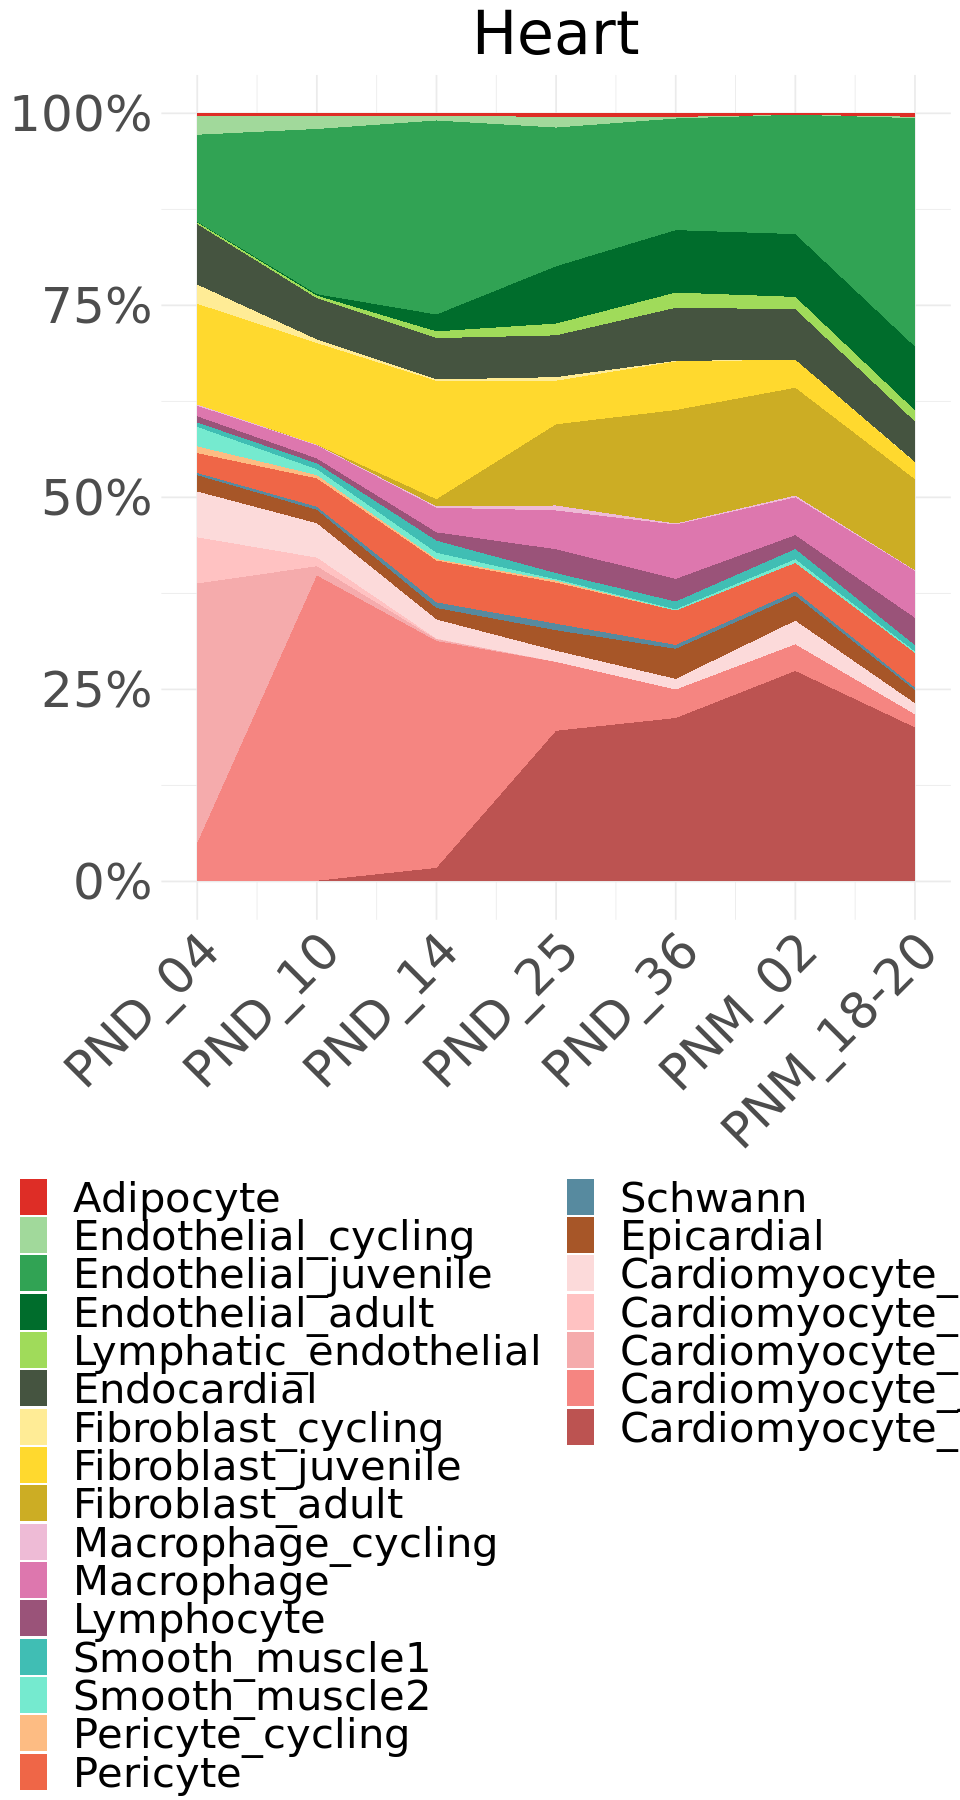

In [27]:
cols = read.csv(paste0("../snrna/ref/",tissue,"_celltypes_colors.csv"))
cols = unique(cols[,c("subtypes","subtype_color")])
col_palette = cols$subtype_color
names(col_palette) = cols$subtypes

options(repr.plot.width = 8, repr.plot.height = 15)

ggplot(df, aes(x=timepoint, y=percentage, fill=subtypes)) + 
    scale_fill_manual(values = col_palette) + 
    labs(title = "Heart")+
    geom_area()  +
    scale_x_continuous(breaks = c(1,2,3,4,5,6,7),labels= c("PND_04","PND_10","PND_14",
                                                         "PND_25","PND_36","PNM_02","PNM_18-20")) +
    scale_y_continuous(labels = scales::percent,
                     limits = c(0, 1)) +
    theme_minimal()+theme(text = element_text(size = 30), plot.title = element_text(hjust = 0.5)) +
    theme(axis.text.y = element_text(size = 30), axis.text.x = element_text(size = 30, angle = 45, hjust = 1)) + 
    theme(axis.title.x = element_blank(), axis.title.y = element_blank()) +
    theme(legend.position="bottom", 
          legend.box="vertical", 
          legend.margin=margin(),
          legend.title=element_blank(),
          legend.text=element_text(size=25))+
    theme(plot.title=element_text(hjust=0.5),plot.subtitle=element_text(hjust=0.5)) + 
    guides(fill=guide_legend(nrow=16))



# Fig. S4c

In [28]:
markers = c("Adipoq","Pnpla2",
            "Flt1","Pecam1","Kdr","Tie1","Tek","Eng","Emcn","Ptprb",
            "Lyve1","Prox1","Flt4","Nrg1","Mgp","Dcn","Col1a1","Pdgfra","Ddr2",
            "Mrc1","Adgre1","Itgam","Fcgr1","Cx3cr1","F13a1",
            "Ms4a1","Ikzf1","Ikzf3","Bcl11a","Themis","Il7r",
            "Acta2","Tagln","Myh11","Mylk","Eln","Myl6","Myl9",
            "Pdgfrb","P2ry14","Abcc9","Sox10","Cadm2","Postn",
            "Plp1","Abi1","Wt1","Aldh1a2",
            "Ryr2","Ttn","Actc1","Tnnt2","Tnnc1",
            "Mybpc3","Myh6","Myh7","Atp2a2",
            "Gata4","Mef2a","Mef2b","Mef2c","Mef2d",
            "Foxo3","Rxrg",
            "Top2a","Mki67")


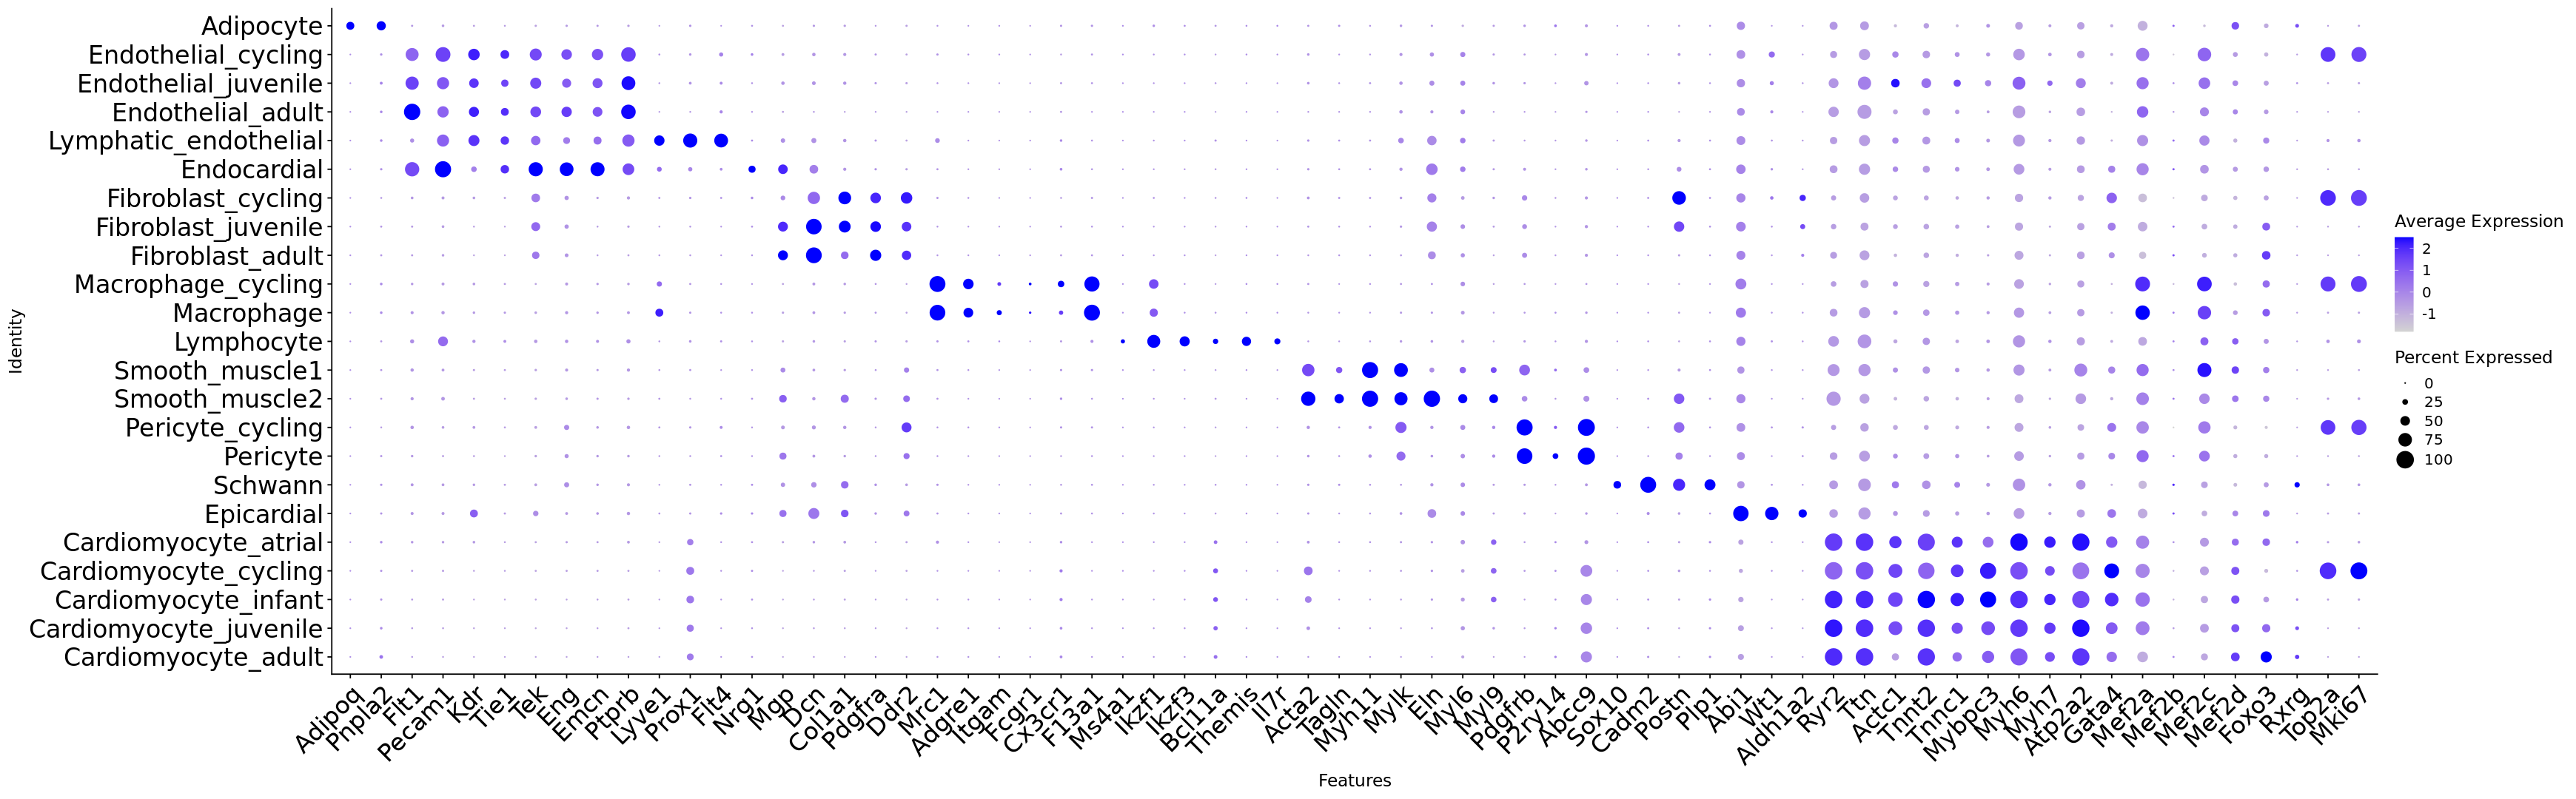

In [29]:
obj@meta.data$subtypes = factor(obj@meta.data$subtypes, levels = rev(subtype_order))

options(repr.plot.width = 29, repr.plot.height = 9)

DotPlot(obj, features = markers, group.by = "subtypes") +
    theme(axis.text.y = element_text(size = 20), 
          axis.text.x = element_text(size = 20, angle = 45, hjust = 1))


# Fig. S5a

In [30]:
tissue = "gastrocnemius"

obj = readRDS(paste0("../snrna/",tissue,"/seurat/",tissue,"_Parse_10x_integrated.rds"))


In [37]:
order = c(21,'25_1',13,28,18,19,3,20,6,10,0,4,8,9,15,1,5,37,24,11,40,38,22,29,
         '25_0',2,7,12,14,17,16,26,27,36,45,30,35,42,23,32,34,39,33,31,44,41,43)

obj@meta.data$sub.cluster = factor(obj@meta.data$sub.cluster, levels = rev(order))


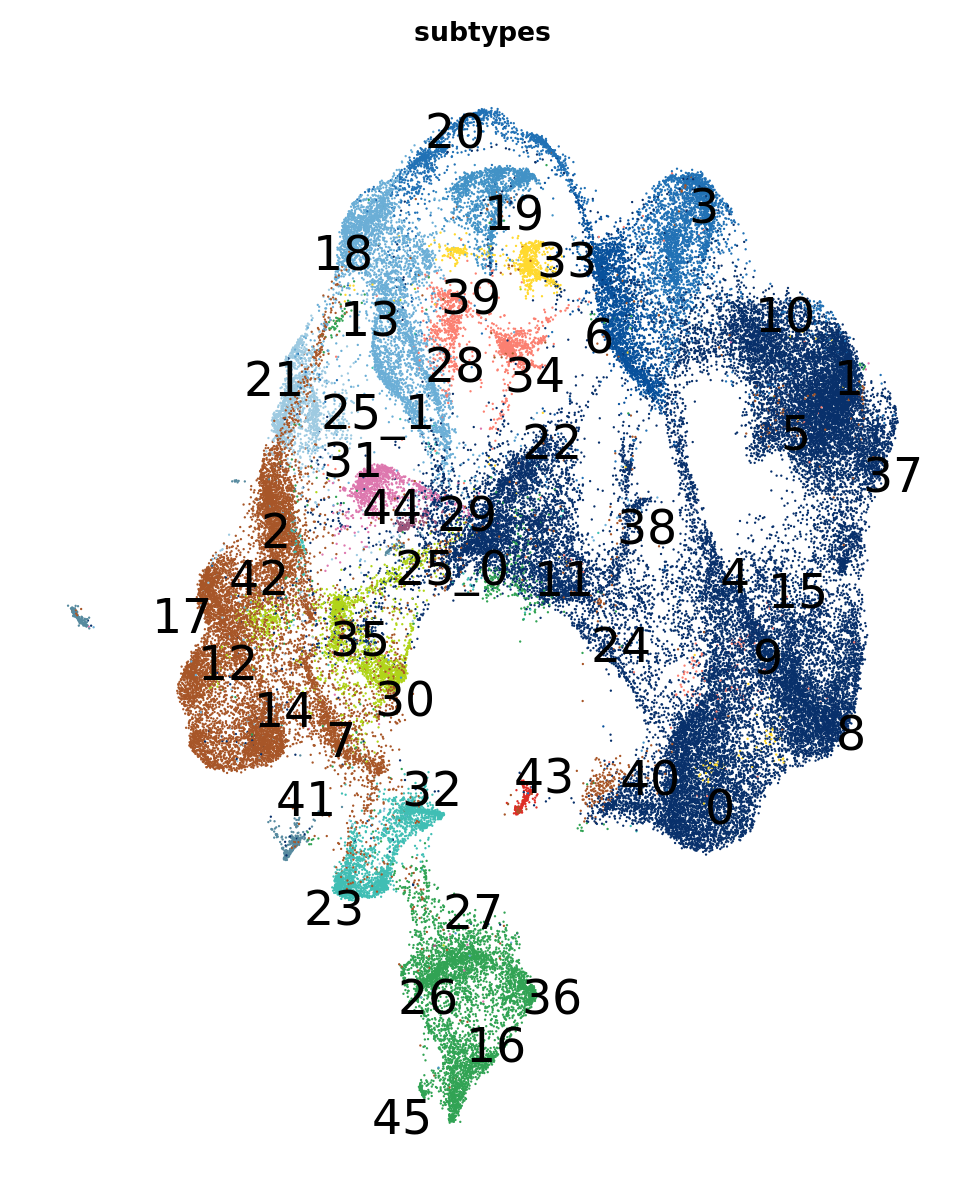

In [38]:
options(repr.plot.width = 8, repr.plot.height = 10)

cols = read.csv(paste0("../snrna/ref/",tissue,"_celltypes_colors.csv"))
cols = unique(cols[,c("subtypes","subtype_color")])
subtype_palette = cols$subtype_color
names(subtype_palette) = cols$subtypes

umap_plot = DimPlot(obj, group.by = "subtypes", label = FALSE)
umap_plot$data$sub.cluster = obj@meta.data$sub.cluster

LabelClusters(umap_plot, id = "sub.cluster", size = 10) + 
    scale_color_manual(values = subtype_palette) +
    NoAxes()+ NoLegend()

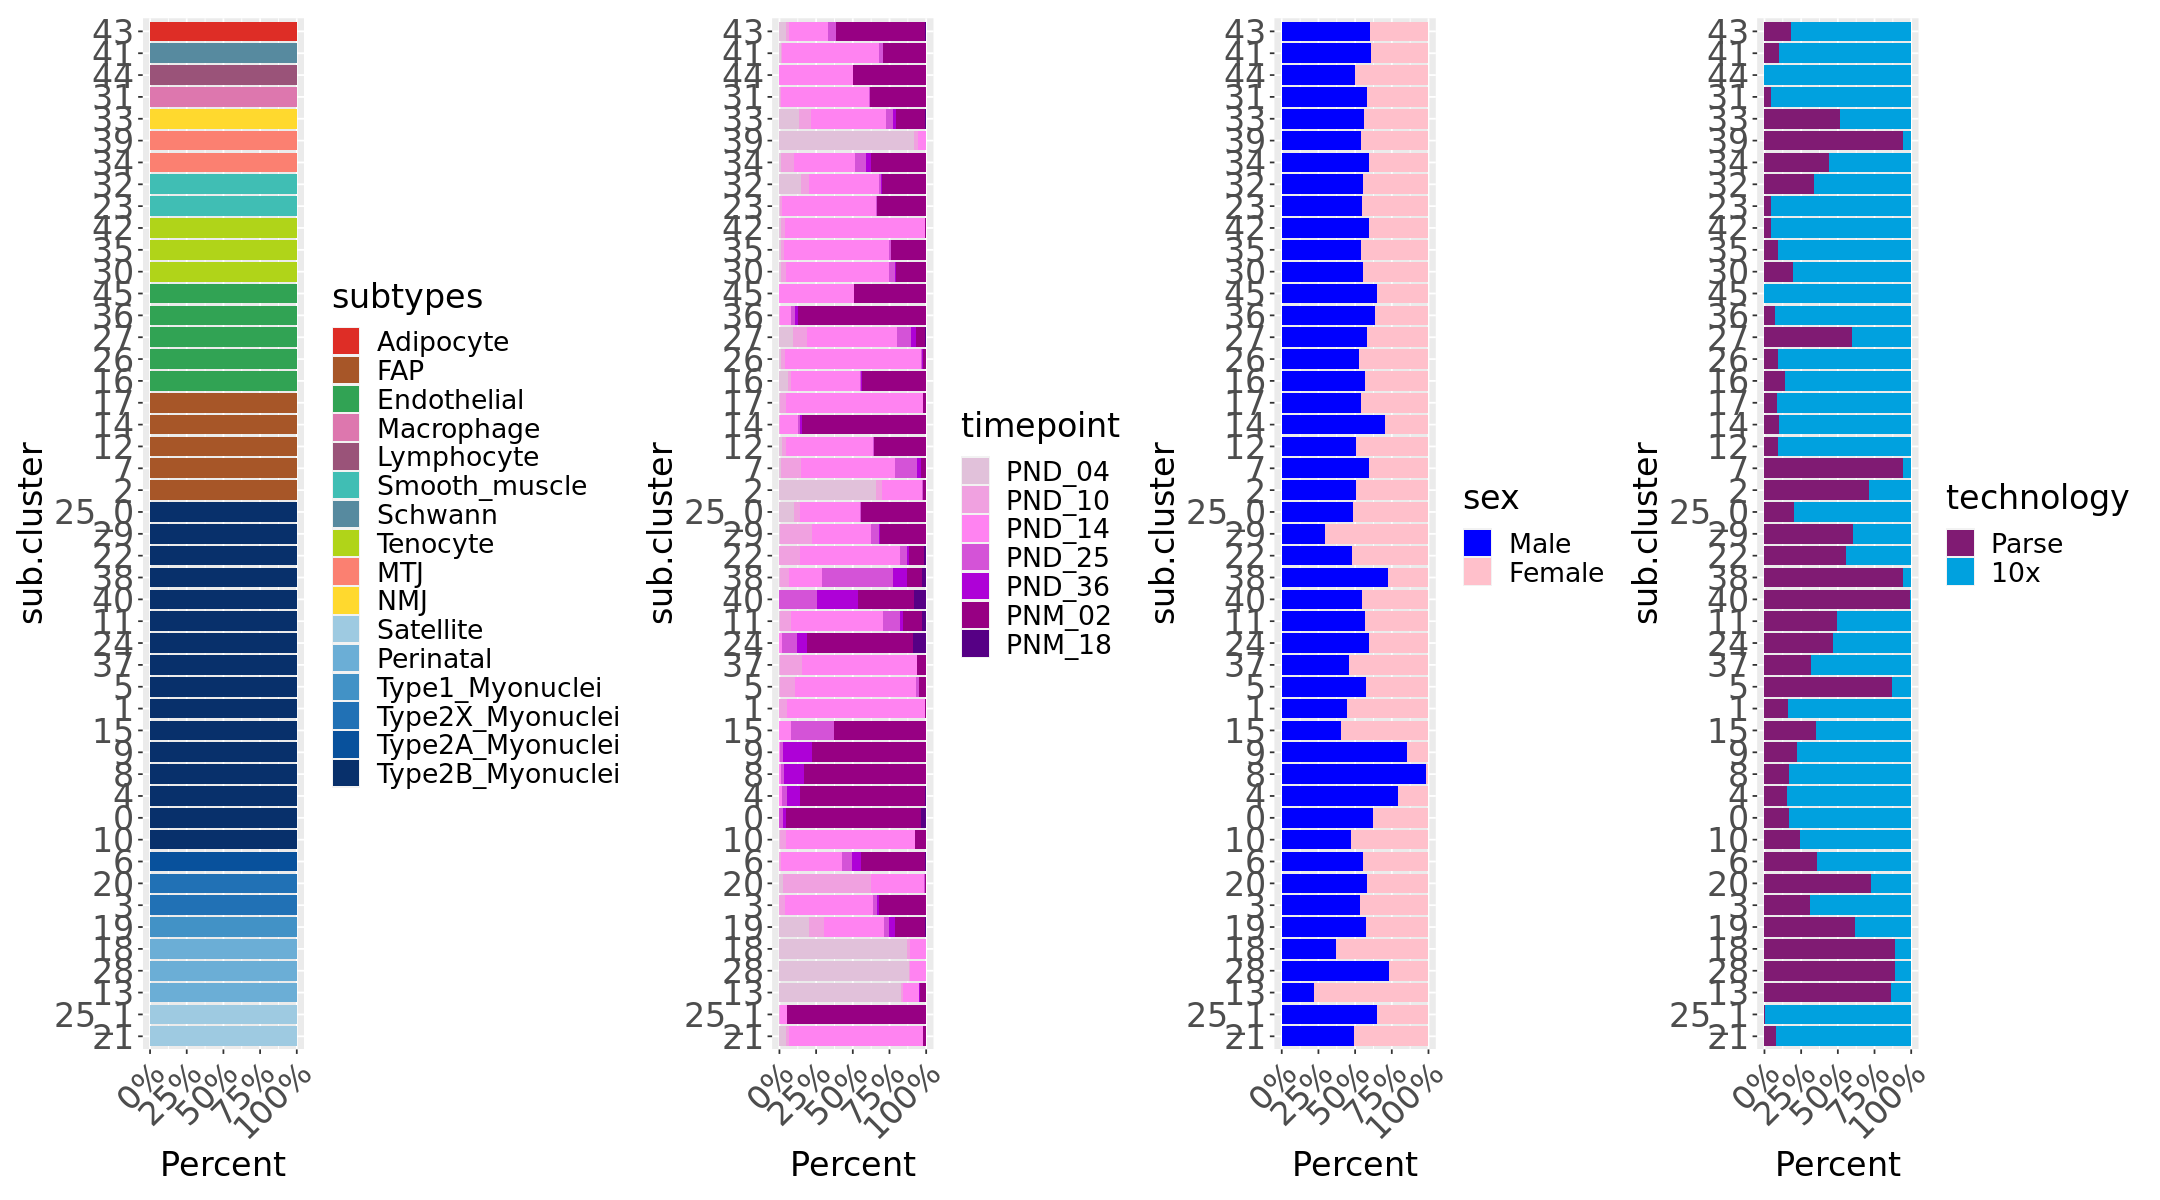

In [36]:
options(repr.plot.width = 18, repr.plot.height = 10)


obj@meta.data$timepoint = factor(obj@meta.data$timepoint, levels = rev(names(tp_palette)))

p1 = ggplot(obj@meta.data, aes(x=sub.cluster, fill=subtypes)) + geom_bar(position = "fill") + 
    scale_fill_manual(values = subtype_palette) + 
    ylab("Percent") +
    scale_y_continuous(labels = scales::percent,
                     limits = c(0, 1)) +
    theme(text = element_text(size = 20), 
          axis.text.x = element_text(size = 20, angle = 45, hjust = 1), 
          axis.text.y = element_text(size = 20)) + coord_flip()


p2 = ggplot(obj@meta.data, aes(x=sub.cluster, fill=timepoint)) + geom_bar(position = "fill") + 
    scale_fill_manual(values = tp_palette) + 
    ylab("Percent") +
    scale_y_continuous(labels = scales::percent,
                     limits = c(0, 1)) +
    theme(text = element_text(size = 20), 
          axis.text.x = element_text(size = 20, angle = 45, hjust = 1), 
          axis.text.y = element_text(size = 20)) + coord_flip()


p3 = ggplot(obj@meta.data, aes(x=sub.cluster, fill=sex)) + geom_bar(position = "fill") + 
    scale_fill_manual(values = sex_palette) + 
    ylab("Percent") +
    scale_y_continuous(labels = scales::percent,
                     limits = c(0, 1)) +
    theme(text = element_text(size = 20), 
          axis.text.x = element_text(size = 20, angle = 45, hjust = 1), 
          axis.text.y = element_text(size = 20)) + coord_flip()


p4 = ggplot(obj@meta.data, aes(x=sub.cluster, fill=technology)) + geom_bar(position = "fill") + 
    scale_fill_manual(values = tech_palette) + 
    ylab("Percent") +
    scale_y_continuous(labels = scales::percent,
                     limits = c(0, 1)) +
    theme(text = element_text(size = 20), 
          axis.text.x = element_text(size = 20, angle = 45, hjust = 1), 
          axis.text.y = element_text(size = 20)) + coord_flip()


combined_plot = p1 + p2 + p3 + p4 +
  patchwork::plot_layout(ncol = 4, byrow = TRUE)
print(combined_plot)

In [39]:
obj@meta.data$sub.cluster = factor(obj@meta.data$sub.cluster, levels = (order))
table(obj$sub.cluster)


  21 25_1   13   28   18   19    3   20    6   10    0    4    8    9   15    1 
1369  335 1802 1173 1417 1416 2831 1370 2567 2237 4737 2699 2435 2320 1539 3491 
   5   37   24   11   40   38   22   29 25_0    2    7   12   14   17   16   26 
2621  710 1275 2199  582  654 1340 1122  936 3298 2555 2067 1692 1429 1530 1233 
  27   36   45   30   35   42   23   32   34   39   33   31   44   41   43 
1200  712   69 1079  720  539 1280  940  871  592  895 1026  152  551  272 

# Fig. S5b

In [40]:
obj_parse = readRDS(paste0("../snrna/",tissue,"/seurat/",tissue,"_Parse.rds"))

df = prop_area(obj_parse)

subtype_order = c("Adipocyte","FAP","Endothelial",
                  "Macrophage","Lymphocyte",
                  "Smooth_muscle","Schwann","Tenocyte","MTJ","NMJ",
                  "Satellite","Perinatal","Type1_Myonuclei","Type2X_Myonuclei","Type2A_Myonuclei","Type2B_Myonuclei")


df$subtypes = factor(df$subtypes, levels = subtype_order)


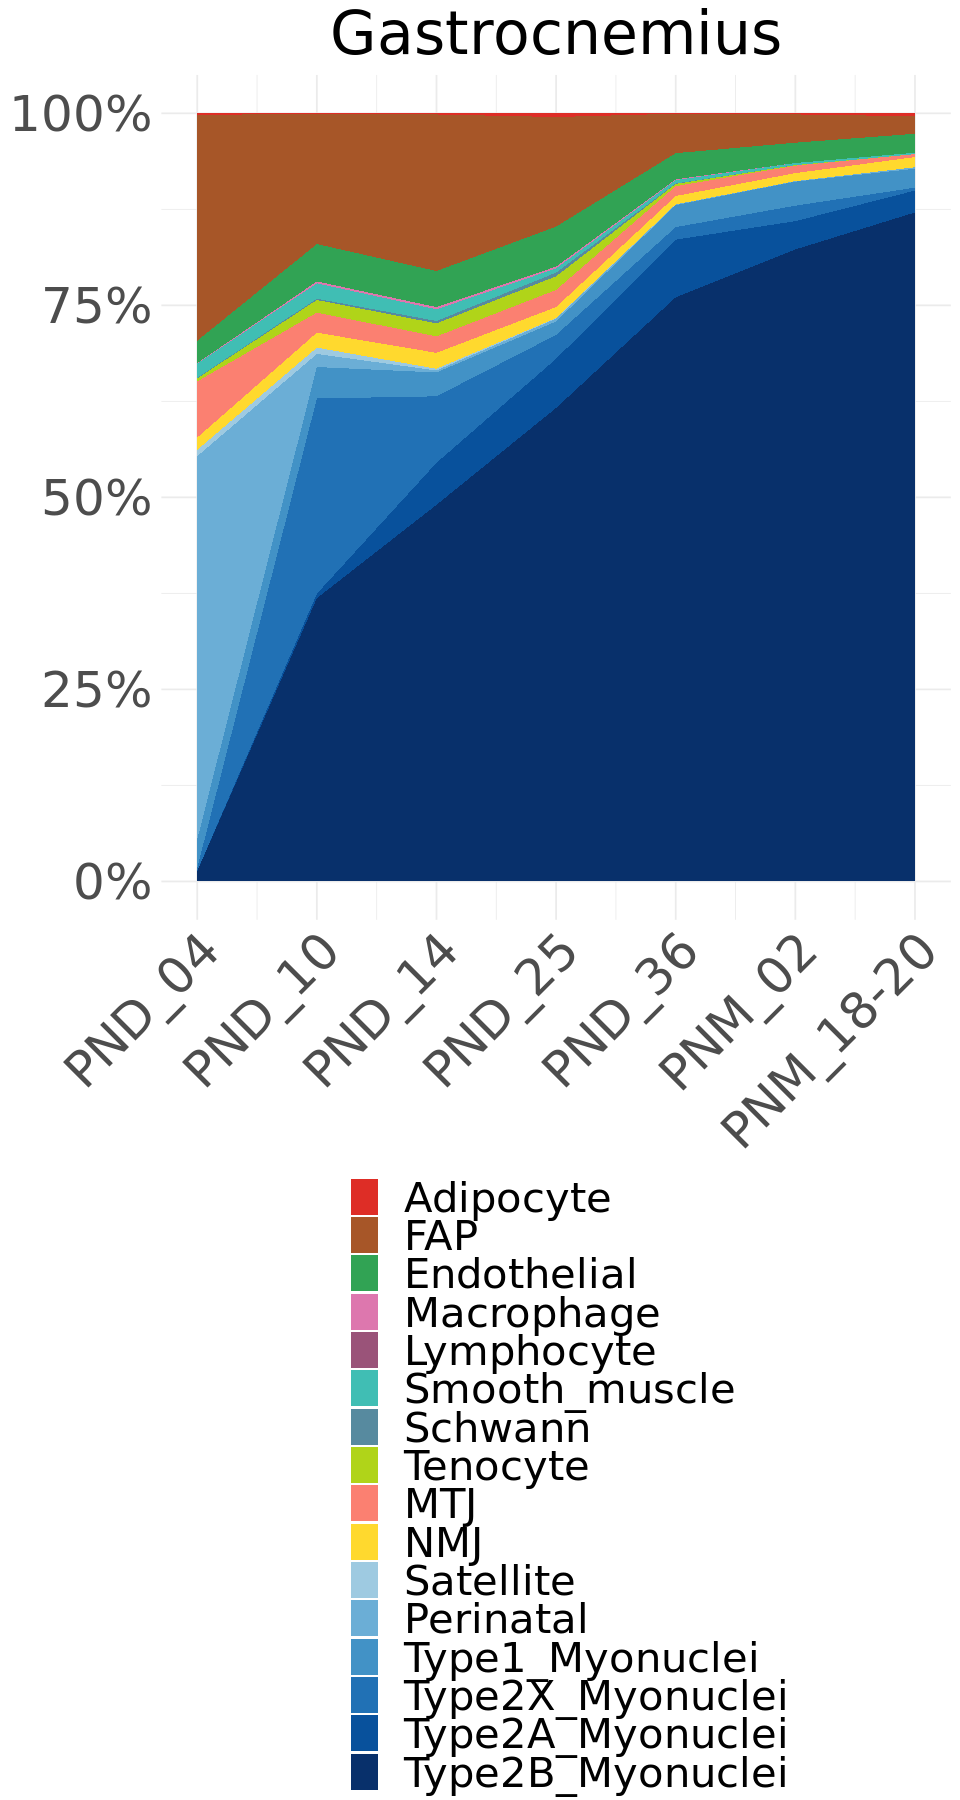

In [41]:
cols = read.csv(paste0("../snrna/ref/",tissue,"_celltypes_colors.csv"))
cols = unique(cols[,c("subtypes","subtype_color")])
col_palette = cols$subtype_color
names(col_palette) = cols$subtypes

options(repr.plot.width = 8, repr.plot.height = 15)

ggplot(df, aes(x=timepoint, y=percentage, fill=subtypes)) + 
    scale_fill_manual(values = col_palette) + 
    labs(title = "Gastrocnemius")+
    geom_area()  +
    scale_x_continuous(breaks = c(1,2,3,4,5,6,7),labels= c("PND_04","PND_10","PND_14",
                                                         "PND_25","PND_36","PNM_02","PNM_18-20")) +
    scale_y_continuous(labels = scales::percent,
                     limits = c(0, 1)) +
    theme_minimal()+theme(text = element_text(size = 30), plot.title = element_text(hjust = 0.5)) +
    theme(axis.text.y = element_text(size = 30), axis.text.x = element_text(size = 30, angle = 45, hjust = 1)) + 
    theme(axis.title.x = element_blank(), axis.title.y = element_blank()) +
    theme(legend.position="bottom", 
          legend.box="vertical", 
          legend.margin=margin(),
          legend.title=element_blank(),
          legend.text=element_text(size=25))+
    theme(plot.title=element_text(hjust=0.5),plot.subtitle=element_text(hjust=0.5)) + 
    guides(fill=guide_legend(nrow=16))



# Fig. S5c

In [42]:
markers = c("Acsl1","Pparg","Adipoq","Pnpla2",
            "Pdgfra","Cd34","Fap","Ly6a",
            "Flt1","Pecam1","Cdh5","Kdr","F13a1",
            "Adgre1","Itgam","Ccr2",
            "Ptprc","Ikzf1","Bcl11a","Themis","Il7r",
            "Myh11","Acta2","Tagln","Mylk","Eln","Myl6","Myl9",
            "Mpz","Sox10","S100b","Mkx","Scx","Tnmd","Egr1",
            "Dcn","Col1a1","Col22a1","Lama2","Etv5","Etv4",
            "Chrne","Colq","Ncam1","Musk","Lrp4","Mybpc1",
            "Tnnt3","Ttn","Ckm","Lmna","Pax7","Myod1","Myog","Myf5",
            "Myh3",
            "Myh8","Myh7","Myh1",
            "Myh2","Myh4","Pvalb","Mybpc2","Actn3",
            "Top2a","Mki67")


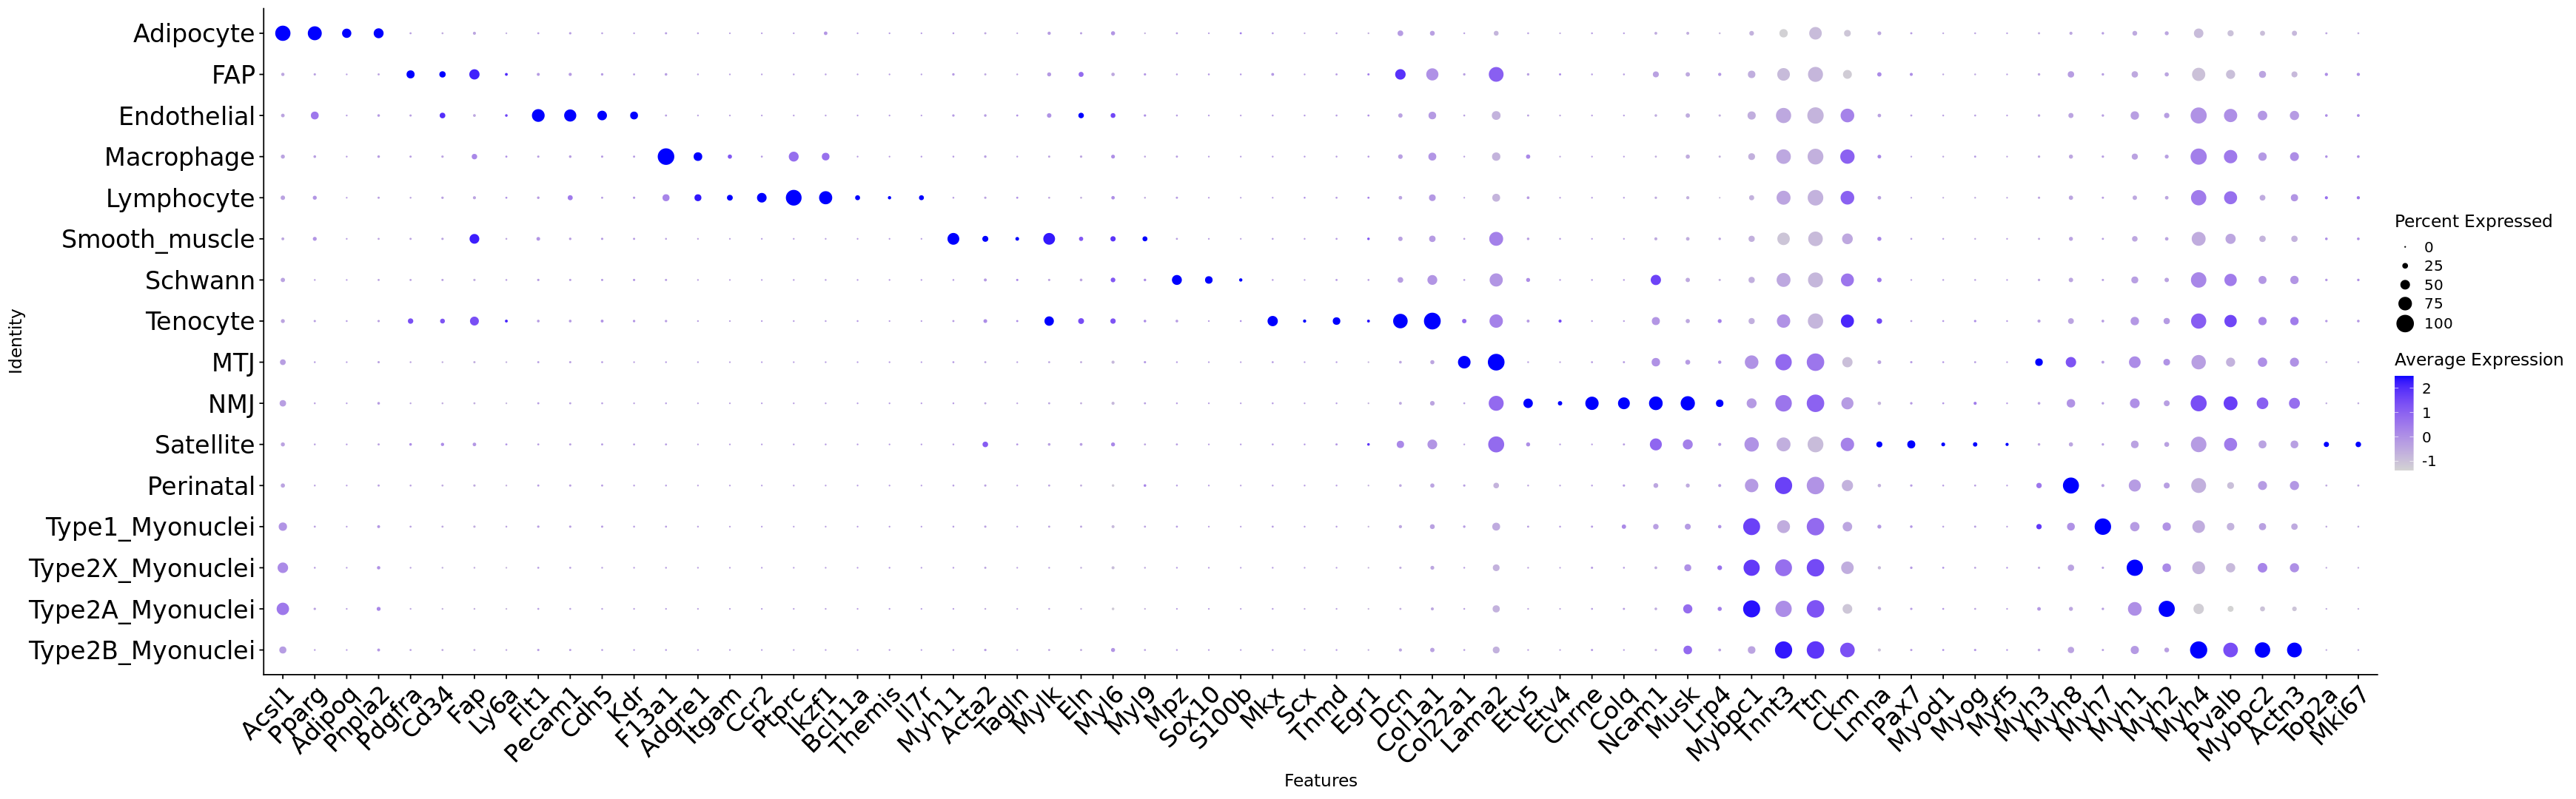

In [43]:
obj@meta.data$subtypes = factor(obj@meta.data$subtypes, levels = rev(subtype_order))

options(repr.plot.width = 29, repr.plot.height = 9)

DotPlot(obj, features = markers, group.by = "subtypes") +
    theme(axis.text.y = element_text(size = 20), 
          axis.text.x = element_text(size = 20, angle = 45, hjust = 1))
